In [243]:
from functions import *

In [244]:
import sys, importlib
importlib.reload(sys.modules['functions'])
from functions import *

comparar valores de EW calculados com e sim binning

Voronoi binning

**Analysing SN2010ev, in galaxy NGC 3244, which has redshift z=0.009213 ± 7.00e-6 (He)**

# Importing data

In [4]:
#import data
file_name="../SN2010ev.fits"
data = fits.open(file_name)
cube = data[1].data   # this is the cube, a (3681 x 341 x 604) matrix with fluxes at different 3681 wavelengths and 308 x 318 spatial pixels ("spaxels")
header = data[1].header # this has information on the data cube
ecube = data[2].data # this is the cube uncertainty (3681 x 341 x 604)
print(np.shape(cube))


print(cube[0])
print(cube[0][200][300])

x_len=len(cube[0][0])
y_len=len(cube[0])

(3681, 341, 604)
[[     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 ...
 [     nan      nan      nan ... 69.65055      nan      nan]
 [     nan      nan      nan ... 68.30897      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]]
91.866684


In [5]:
#  -- following is to the get the wavelength array
CRVAL = float(header["CRVAL3"])
NAXIS = int(header["NAXIS3"])
CDELT = float(header["CD3_3"])
CRPIX = float(header["CRPIX3"])
wave = np.array(CRVAL + CDELT * (np.arange(NAXIS) - CRPIX))

In [6]:
#testing function findWavelengths
result = findWavelengths(wave, 5000)
print("Closest elements:", result)

result = findWavelengths(wave, [5000,4000,6000])
print("Closest elements:", result)

Closest elements: (4999.6923828125, 201)
Closest elements: [(4999.6923828125, 201), (4748.4423828125, 0), (5999.6923828125, 1001)]


# Plotting cube images

## Plotting cube at Hα

In [7]:
z=0.009213

halpha_rest=6562.8
halpha_obs=6562.8*(1+z)
wave_selection=[]

wavelen,index=findWavelengths(wave, halpha_obs)

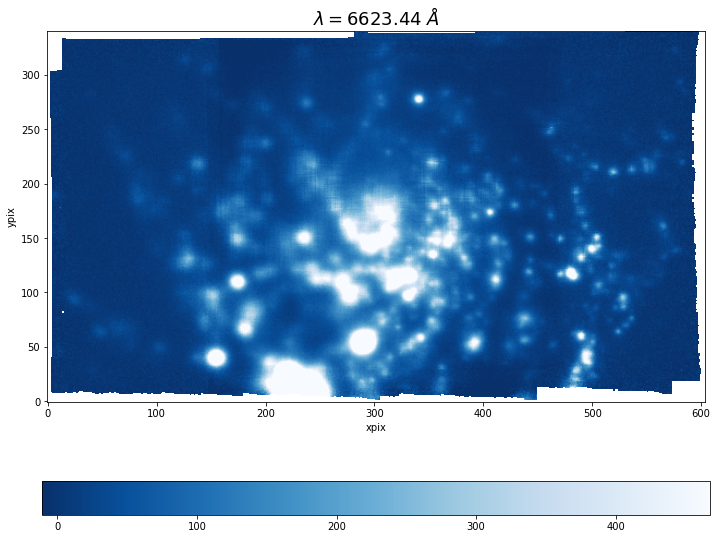

In [8]:
img_data=cube[index]

plot_image(img_data,wavelen, index, 'Blues_r')

In [9]:
print('Min:', np.nanmin(img_data))
print('Max:', np.nanmax(img_data))
print('Mean:', np.nanmean(img_data))
print('Stdev:', np.nanstd(img_data))

Min: -67.27145
Max: 6526.5054
Mean: 62.408295
Stdev: 175.11049


In [10]:
len(img_data.flatten())
y_len*x_len

205964

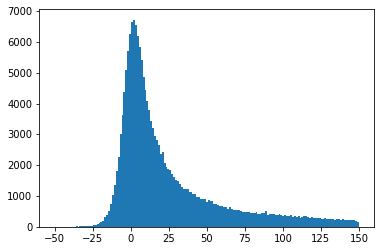

In [11]:
histogram = plt.hist(img_data.flatten(), bins='auto',range=[-50,150])

## Plotting cube at various wavelengths

In [12]:
W=5000
V=5510 #V (Visible/Green): ~551 nm
R=6580 #R (Red): ~658 nm

halpha=6563

xx=[W,V,R,halpha_obs]

selection=findWavelengths(wave, xx)

waves=np.transpose(selection)[0]
indices=np.transpose(selection)[1]
indices = indices.astype(int)

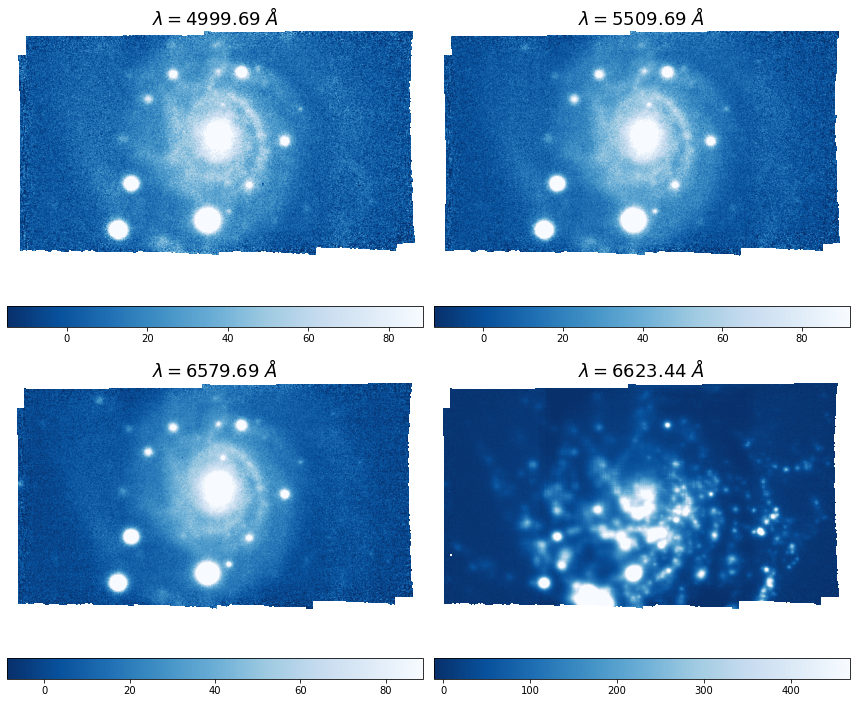

In [13]:
plot_image(cube[indices],wave[indices], indices, 'Blues_r')

## Making a gif around Halpha

In [14]:
xx=[halpha_obs-10,halpha_obs+10]

selection=findWavelengths(wave,xx)

waves=np.transpose(selection)[0]
indices=np.transpose(selection)[1]
indices = indices.astype(int)

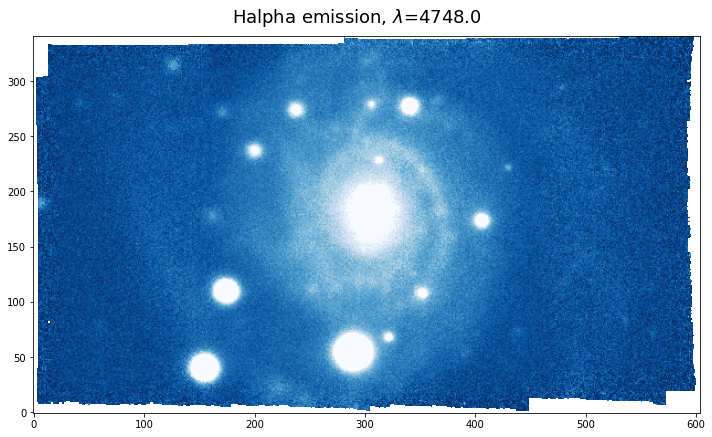

In [15]:


image_array = cube[indices[0]:indices[1]]



fig, ax = plt.subplots(figsize=(10, 8))


# Set the initial image
image=cube[indices[0]];
lo,up = np.nanpercentile(image,2),np.nanpercentile(image,98)

im = ax.imshow(image, animated=True,cmap="Blues_r",origin='lower',clim=(lo,up))
plt.tight_layout()
def update(i):
    im.set_array(image_array[i])
    fig.suptitle("Halpha emission, $\lambda$="+str(round(wave[i],0)),fontsize=18,y=0.85)
    
    return im,


# Create the animation object
animation_fig = animation.FuncAnimation(fig, update, frames=len(image_array), interval=400, blit=True,repeat_delay=15,)

# Show the animation
plt.tight_layout()
plt.show()

animation_fig.save("im.gif")

In [16]:
from PIL import Image

im = []
for n in range(20):
    arr = np.random.randint(low = 0, high = 255, size = (300, 300, 3))
    im.append(Image.fromarray(arr.astype('uint8')))

im[0].save('im.gif', save_all=True, append_images=im[1:], optimize=False, duration=200, loop=0)

## Plotting median within a certain waveband

0 1
[4748.44238281 4749.69238281]


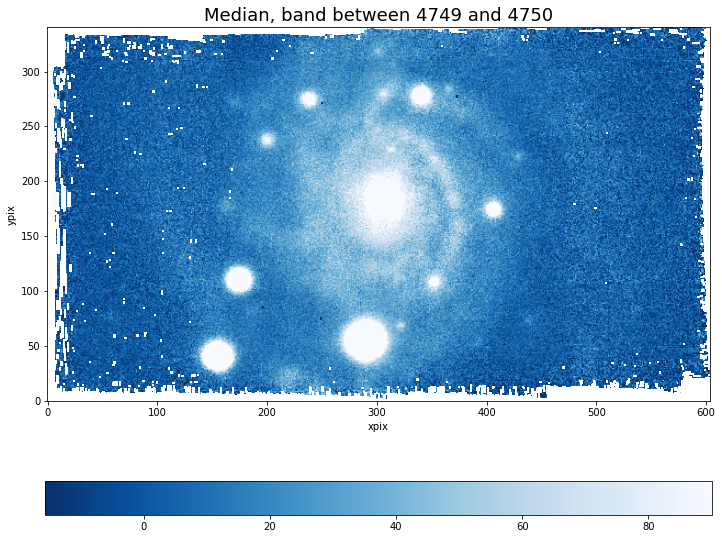

In [17]:
med=median(cube,wave,[4749,4750])


plot_image(med,wavelengths=[4749,4750],index=[4749,4750], colormap='Blues_r',title='Median, band between 4749 and 4750')


#median(cube,wave,[np.max(wave),np.min(max)])


## Plotting average within a certain waveband

0 1
[4748.44238281 4749.69238281]


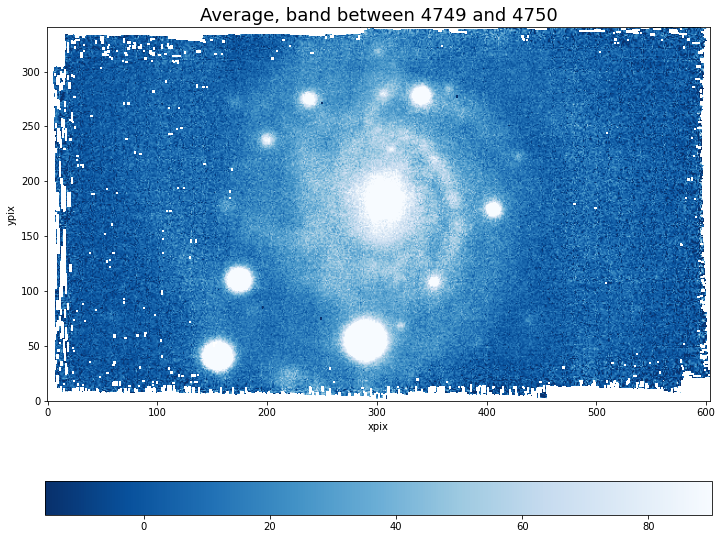

In [18]:
ave=average(cube,wave,[4749,4750])


plot_image(ave,wavelengths=[4749,4750],index=[4749,4750], colormap='Blues_r',title='Average, band between 4749 and 4750')


#ave(cube,wave,[np.max(wave),np.min(max)])


# Binning

## Binning 2x2

In [78]:
z=0.009213

halpha_rest=6562.8
halpha_obs=6562.8*(1+z)
wave_selection=[]

wavelen,index=findWavelengths(wave, halpha_obs)

img_data=cube[index]

print("dimensions before binning: ", len(img_data),len(img_data[0]))

binned_data=binning(img_data,4)

print("dimensions after binning: ", len(binned_data),len(binned_data[0]))


dimensions before binning:  341 604
dimensions after binning:  86 151


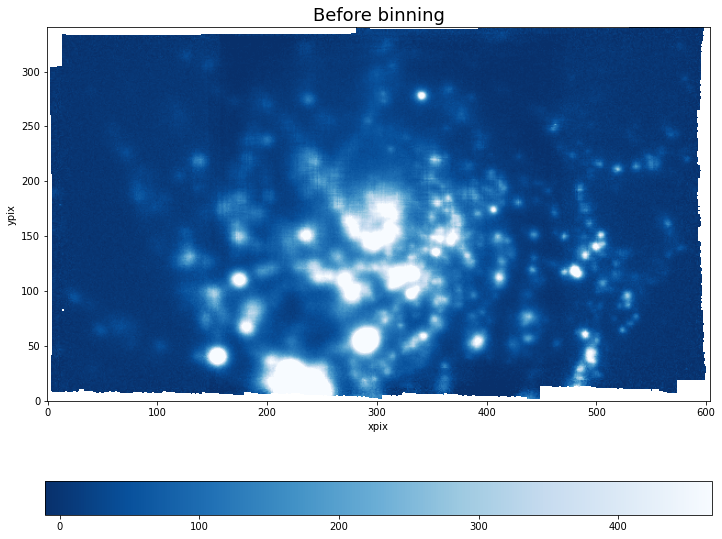

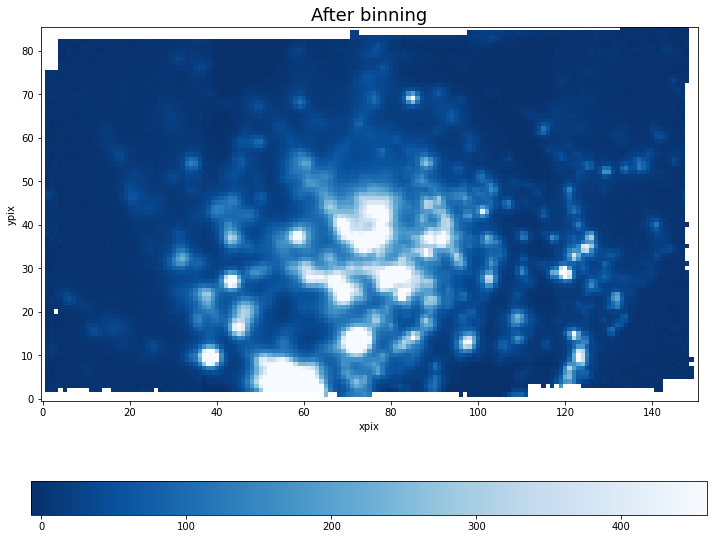

In [79]:
plot_image(img_data,wavelen, index, 'Blues_r', "Before binning")
plot_image(binned_data,wavelen, index, 'Blues_r',"After binning")

In [80]:
np.shape(cube)

(3681, 341, 604)

## Region w/ high SNR

Zoom in area of background signal

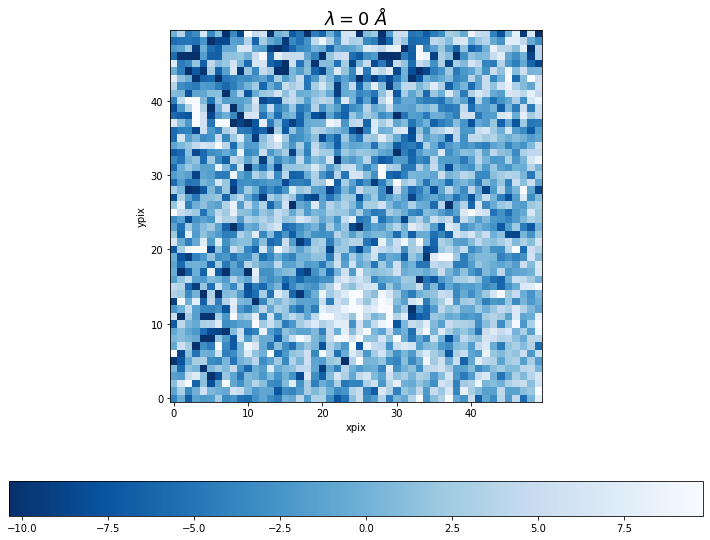

In [81]:
bg=img_data[270:320, 15:65]
plot_image(bg,0,0,'Blues_r')

In [82]:
# background noise
noise = np.nanstd(bg)

snr_map = img_data / noise
mean_snr = np.nanmean(snr_map)
threshold = 0.5 * mean_snr


square_size = 1000


#best square
best_square = None
best_snr = -np.inf  
best_coords = (0, 0)


h, w = image.shape
for y in range(0, h - square_size + 1, square_size):
    for x in range(0, w - square_size + 1, square_size):
        
        block = snr_map[y:y+square_size, x:x+square_size]

        block_mean_snr = np.mean(block)

        if block_mean_snr > best_snr:
            best_snr = block_mean_snr
            best_square = block
            best_coords = (y, x)

if best_square is not None:
    np.save("../best_snr_square.npy", best_square)
    print(f"Saved the best SNR square at {best_coords} with mean SNR {best_snr:.2f}")

best_square = np.load("../best_snr_square.npy")
print(best_square)

[[24.733227  23.659376  23.296698  ...  8.002031   6.8485003  6.3015223]
 [25.289423  24.369799  22.9598    ...  6.986258   6.1466255  7.6385193]
 [23.431923  22.804512  24.332674  ...  7.397483   7.678427   5.837128 ]
 ...
 [31.349007  31.20333   35.570824  ... 10.715965  10.636392  11.201308 ]
 [28.347382  27.447086  30.333021  ...  9.965655  11.025977  11.6718   ]
 [25.059385  26.852942  27.987513  ...  9.946177  11.049753  11.41961  ]]


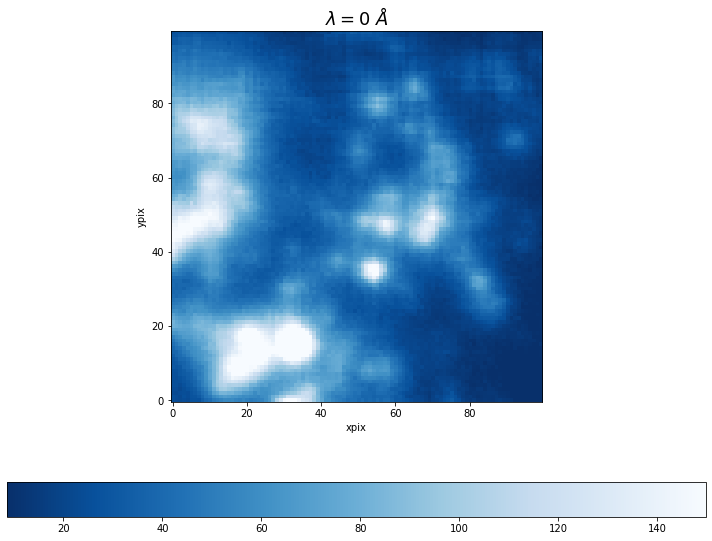

In [83]:
plot_image(best_square,0,0,'Blues_r')

## Binning of galaxy bulge

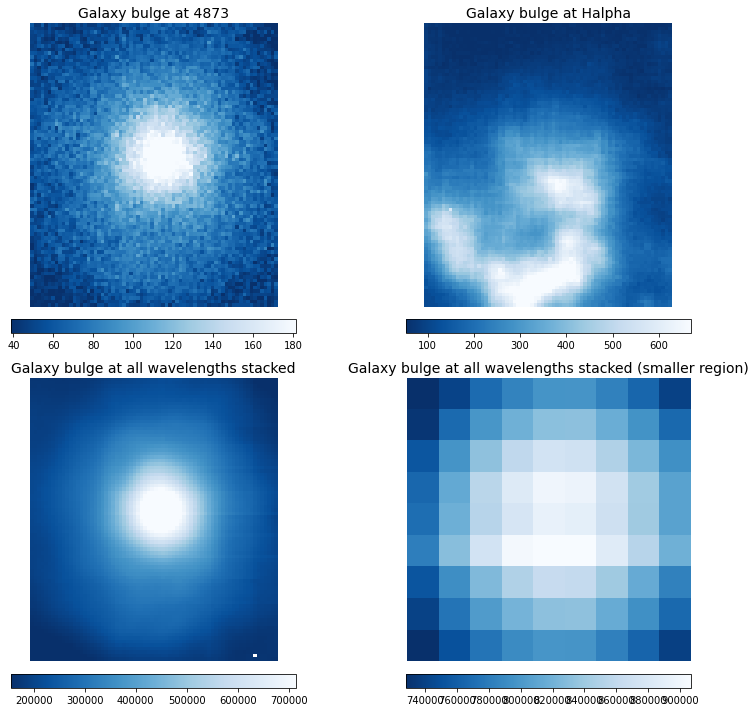

In [84]:
bulge=cube[:,140:220,270:340];
ebulge=ecube[:,140:220,270:340];

small_bulge=cube[:,178:187,302:311]
#small_bulge=cube[:,181:185,305:307]

images = [
    bulge[100],
    bulge[index], 
    stack_all(bulge),
    stack_all(small_bulge)
]

titles = [
    "Galaxy bulge at "+str(int(round(wave[100],0))),
    "Galaxy bulge at Halpha",
    "Galaxy bulge at all wavelengths stacked",
    "Galaxy bulge at all wavelengths stacked (smaller region)"
]

plot_images(images, wavelengths=[0, 0, 0, 0], colormap='Blues_r', titles=titles)


In [85]:
stacked_bulge=stack(bulge,wave,number_images=10,central_wavelength=halpha_obs)
stacked_ebulge=stack(ebulge,wave,number_images=10,central_wavelength=halpha_obs)

binned_bulge=binning(bulge[index],4)
ebinned_bulge=binning(ebulge[index],4)

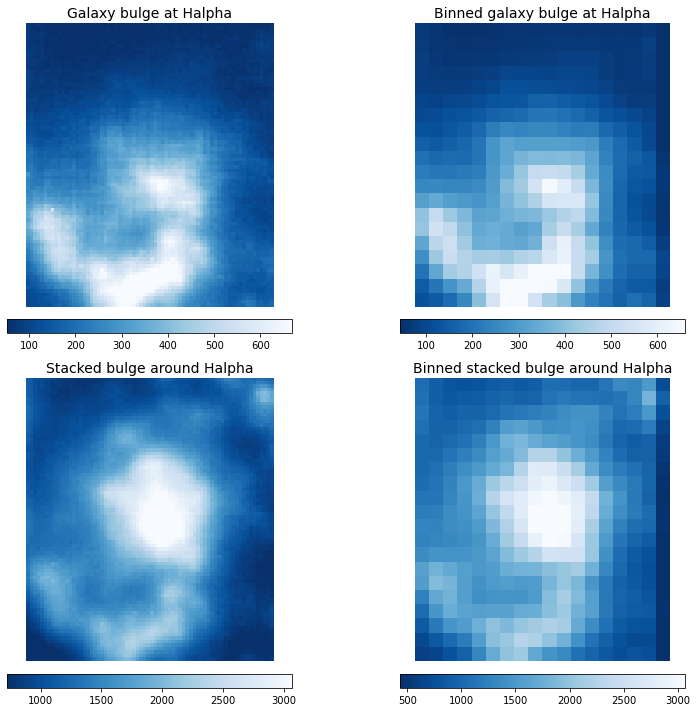

In [86]:
images = [
    bulge[index], 
    binned_bulge, 
    stacked_bulge, 
    binning(stacked_bulge, 4)
]

titles = [
    "Galaxy bulge at Halpha",
    "Binned galaxy bulge at Halpha",
    "Stacked bulge around Halpha",
    "Binned stacked bulge around Halpha"
]

plot_images(images, wavelengths=[0, 0, 0, 0], colormap='Blues_r', titles=titles)


In [87]:
binned_stacked_bulge=binning(stack(bulge,wave,number_images=10,central_wavelength=halpha_obs),4)
binned_stacked_ebulge=binning(stack(ebulge,wave,number_images=10,central_wavelength=halpha_obs),4)

print("Median SNR before binning = ",np.median(signaltonoise(stacked_bulge,stacked_ebulge)), "\nMedian SNR after stacking&binning = ",np.median(signaltonoise(binned_stacked_bulge,binned_stacked_ebulge)))
      

Median SNR before binning =  4.6879454 
Median SNR after stacking&binning =  4.642662903020382


so SNR is lower after binning?(*) could be because i am computing the same SNR for a bin for all the pixels that were collapsed

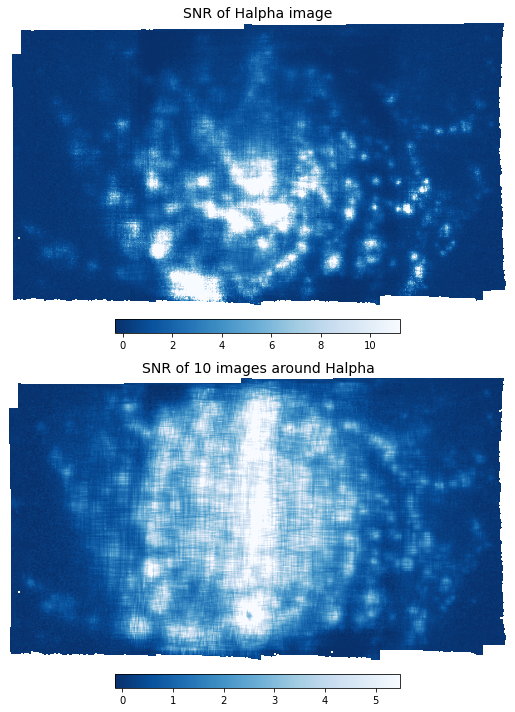

Average of SNR in the image is  1.5096688
Average of SNR in the image is  1.4523461
Median of SNR in the image is  0.4109841
Median of SNR in the image is  0.79283464

SNR gets worse on average, but not in median(**)


In [88]:
snr1=signaltonoise(cube[index],ecube[100])
#plot_image(snr,0,0,colormap='Blues_r',title="SNR of Halpha image")

stacked_galaxy=stack(cube,wave,number_images=10,central_wavelength=halpha_obs)
stacked_uncertainties=stack(ecube,wave,number_images=10,central_wavelength=halpha_obs)


snr2=signaltonoise(stacked_galaxy,stacked_uncertainties)

plot_images([snr1,snr2],wavelengths=[0, 0],colormap='Blues_r',titles=["SNR of Halpha image","SNR of 10 images around Halpha"])

print("Average of SNR in the image is ",np.nanmean(snr1))
print("Average of SNR in the image is ",np.nanmean(snr2))
print("Median of SNR in the image is ",np.nanmedian(snr1))
print("Median of SNR in the image is ",np.nanmedian(snr2))
print("\nSNR gets worse on average, but not in median(**)")

## Stacked galaxy bulge spetra

Text(0.5, 1.0, 'Median spectra of galaxy bulge')

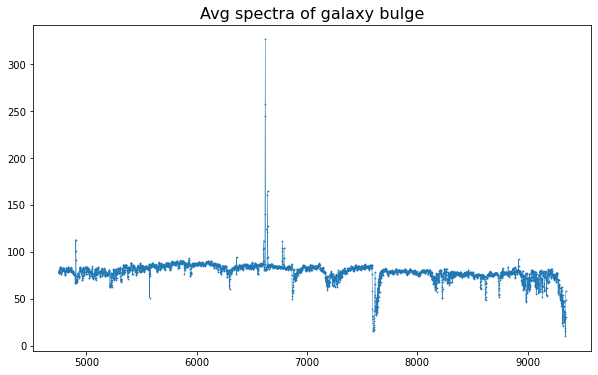

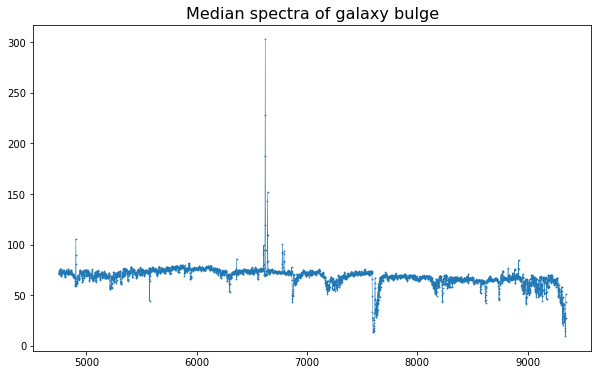

In [89]:
plt.figure(figsize=(10,6))

plt.plot(wave,avg_spectra_of_region(bulge),linewidth=0.5,alpha=0.95)
plt.scatter(wave,avg_spectra_of_region(bulge),s=0.5)
plt.title("Avg spectra of galaxy bulge",fontsize=16)



plt.figure(figsize=(10,6))

median_bulge=median_spectra_of_region(bulge)
plt.plot(wave,median_bulge,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bulge,s=0.5)
plt.title("Median spectra of galaxy bulge",fontsize=16)




In [90]:
new_wave=wave/(1+z)
halpha_obs

6623.2630764

in x_obs we look for halpha_obs=6562.8*(1+z)

so in x_obs/(1+z) we look for 6562.8

Text(0.5, 1.0, 'Median spectra of smaller region of galaxy bulge')

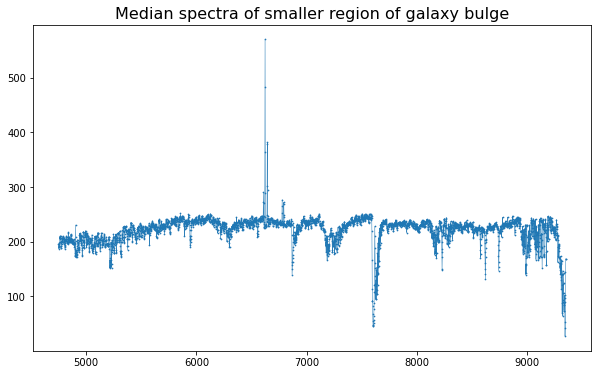

In [91]:
plt.figure(figsize=(10,6))



plt.plot(wave,median_spectra_of_region(small_bulge),linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_spectra_of_region(small_bulge),s=0.5)
plt.title("Median spectra of smaller region of galaxy bulge",fontsize=16)

#plt.xlim(halpha_obs-50,halpha_obs+50)

## Different galaxy regions

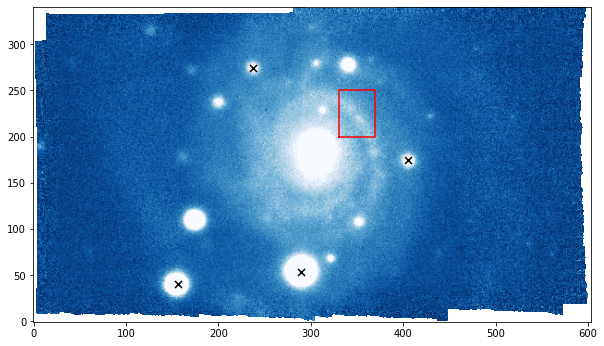

In [92]:
arm=cube[:,200:250,330:370]
           
i=findWavelengths(wave, R)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [330, 330, 370, 370, 330]
y_coords = [200, 250, 250, 200, 200] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline


star_x=[289,156,237,405]#175
star_y=[53,40,274,175]#110
plt.scatter(star_x,star_y,s=50,marker='x',c='black')


spectra at star (single pixel)

In [93]:
arr=np.transpose((star_x,star_y))
lbls = ["Star (single pixel spectra) at (x,y)= ({},{})".format(row[0], row[1]) for row in arr]

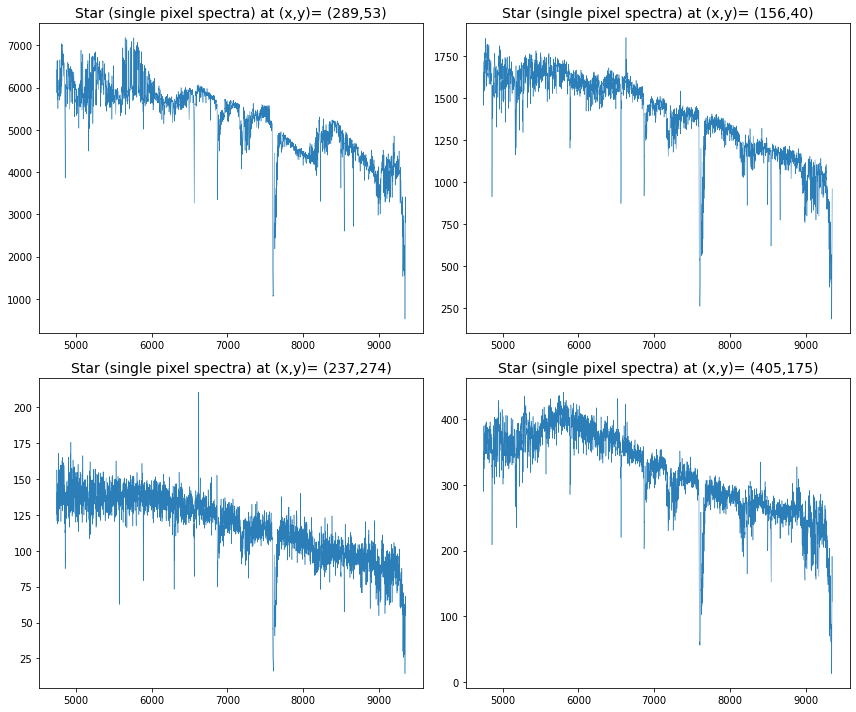

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = np.array(axes).reshape(-1)
    
for i in range(4):
    lo, up = np.nanpercentile(images[i], 2), np.nanpercentile(images[i], 98)
    im = axes[i].plot(wave,cube[:,star_y[i],star_x[i]],linewidth=0.5,alpha=0.95)
    axes[i].set_title(lbls[i], fontsize=14)
    
# Hide unused subplots if grid has extra slots
for j in range(4, len(axes)):
    axes[j].axis('off')
    
    

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Median spectra of galaxy arm')

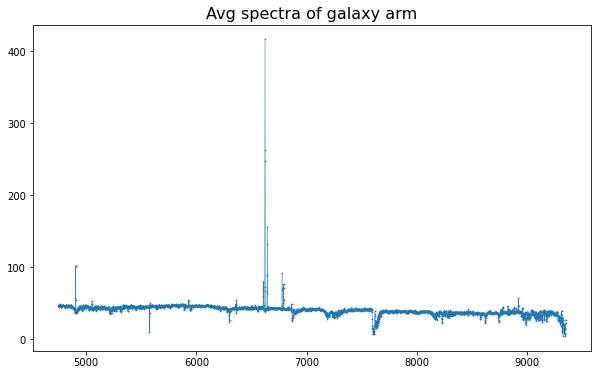

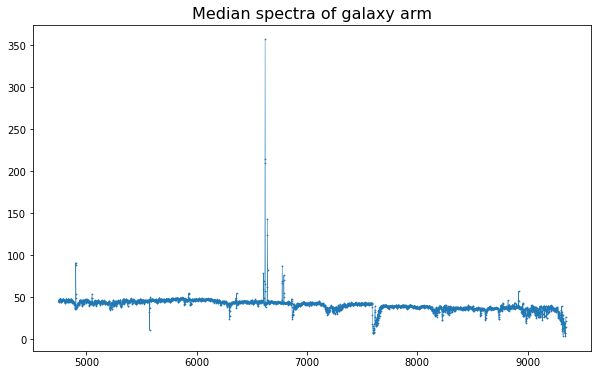

In [95]:
plt.figure(figsize=(10,6))

plt.plot(wave,avg_spectra_of_region(arm),linewidth=0.5,alpha=0.95)
plt.scatter(wave,avg_spectra_of_region(arm),s=0.5)
plt.title("Avg spectra of galaxy arm",fontsize=16)



plt.figure(figsize=(10,6))

median_arm=median_spectra_of_region(arm)
plt.plot(wave,median_arm,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_arm,s=0.5)
plt.title("Median spectra of galaxy arm",fontsize=16)

Text(0.5, 1.0, 'Median spectra of galaxy bg')

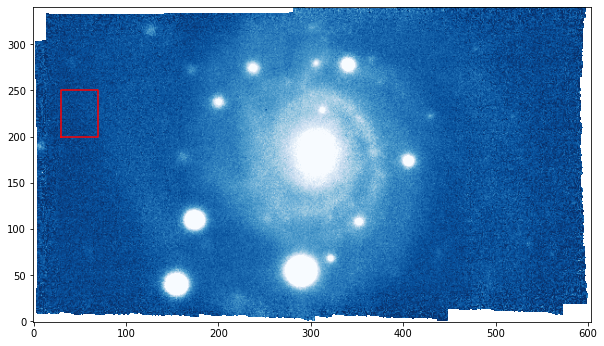

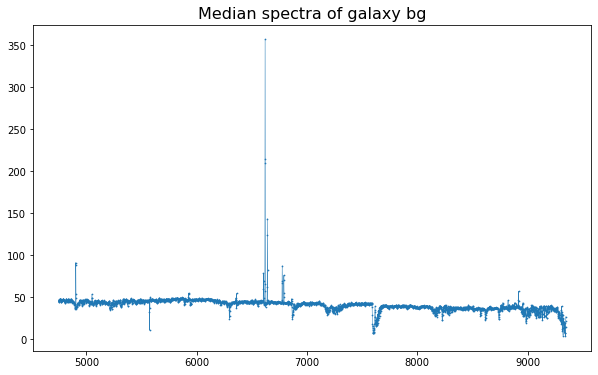

In [96]:
bg=cube[:,200:250,30:70]
           
i=findWavelengths(wave, R)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [30, 30, 70, 70, 30]
y_coords = [200, 250, 250, 200, 200] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline




plt.figure(figsize=(10,6))

plt.plot(wave,median_arm,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_arm,s=0.5)
plt.title("Median spectra of galaxy bg",fontsize=16)

## Plotting uncertainty of spectra

In [97]:
uncertainty=ecube[:,200:250,30:70]
y_err=np.sqrt(np.median(uncertainty, axis=(1, 2)));

np.median(uncertainty[2])

88.63081

In [98]:
median_bg=median_spectra_of_region(bg)

y_err2=mad(median_bg)
print(y_err,y_err2)

[      nan 10.026817  9.414394 ...  6.174121  7.762108       nan] 0.21641612


In [99]:
np.sqrt(y_err[2])

3.0682886

In [100]:
median_bg=median_spectra_of_region(bg)

Text(0.5, 1.0, 'Background spectra')

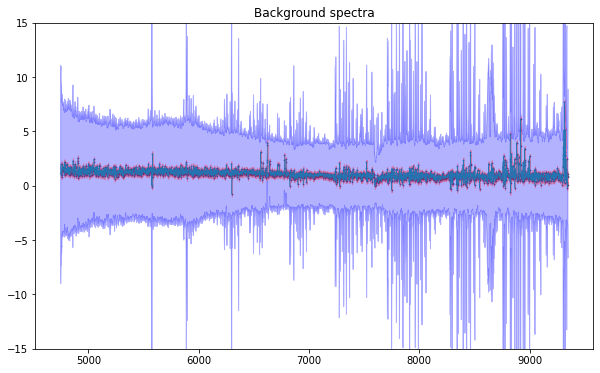

In [101]:
plt.figure(figsize=(10,6))

plt.plot(wave,median_bg,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bg,s=0.5)

plt.fill_between(wave,median_bg - y_err, median_bg + y_err, color='blue', alpha=0.3, label="Uncertainty")
plt.fill_between(wave,median_bg - y_err2, median_bg + y_err2, color='red', alpha=0.3, label="Uncertainty")
plt.ylim(-15,15)

plt.title("Background spectra")

In [102]:
y_err2=mad(median_bulge)
print(y_err,y_err2)

[      nan 10.026817  9.414394 ...  6.174121  7.762108       nan] 3.808239


Text(0.5, 1.0, 'Bulge spectra')

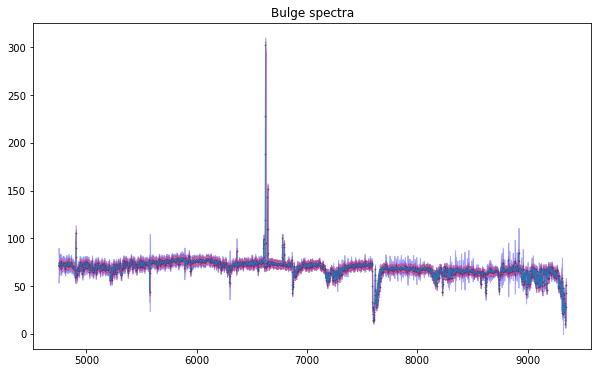

In [103]:
y_err=np.sqrt(np.median(ebulge, axis=(1, 2)));#median absolute deviaton=MAD

plt.figure(figsize=(10,6))

plt.plot(wave,median_bulge,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bulge,s=0.5)

plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")
plt.fill_between(wave,median_bulge - y_err2, median_bulge + y_err2, color='red', alpha=0.3, label="Uncertainty")
#plt.ylim(-15,15)
plt.title("Bulge spectra")

In [104]:
print("median snr of spectra is ",np.nanmedian(signaltonoise_spec(median_bulge,y_err)))

median snr of spectra is  13.528046


# EW

## EW - parametric

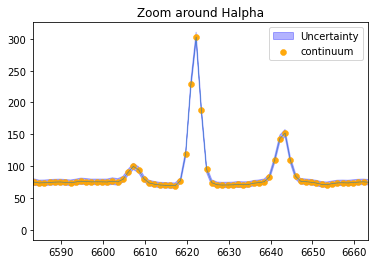

In [105]:
plt.plot(wave,median_bulge,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_bulge,s=0.5)

plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")

x_min, x_max= plt.xlim(halpha_obs-40,halpha_obs+40)
plt.title("Zoom around Halpha")
x_chopped,y_chopped=chop_data(wave,median_bulge,x_min,x_max)

plt.scatter(x_chopped,y_chopped,linewidth=0.5,alpha=0.95,color="orange",label="continuum")

plt.legend()

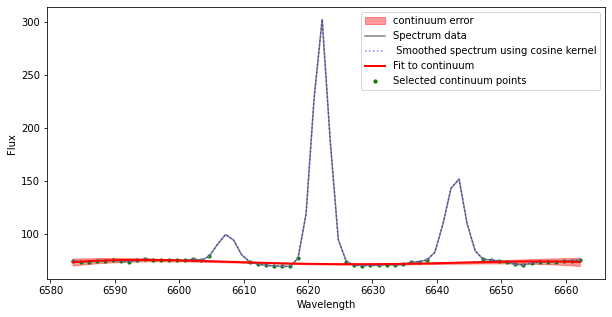

In [114]:
y_smooth=smooth_spectra(y_chopped,kernel_size=3)

continuum_fit, x_continuum, y_continuum, continuum_err =continuum(x_chopped,y_smooth)

y_continuum_fit = continuum_fit(x_chopped)


cont_err=continuum_err(x_chopped)

plt.figure(figsize=(10, 5))
plt.fill_between(x_chopped,y_continuum_fit - cont_err, y_continuum_fit + cont_err, color='red', alpha=0.4, label="continuum error")
plt.plot(x_chopped, y_chopped, label="Spectrum data", color="gray")
plt.plot(x_chopped, y_smooth, label=" Smoothed spectrum using cosine kernel", color="blue", alpha=0.5,linestyle="dotted")
plt.plot(x_chopped, y_continuum_fit, label="Fit to continuum", color="red", linewidth=2)
plt.scatter(x_continuum, y_continuum, color="green", s=10, label="Selected continuum points")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.legend()
#plt.xlim(6400,6500)
plt.show()

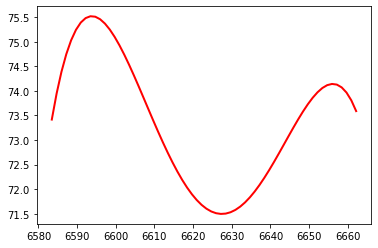

In [115]:
plt.plot(x_chopped, y_continuum_fit, color="red", linewidth=2)


ValueError: operands could not be broadcast together with shapes (3681,) (7,) 

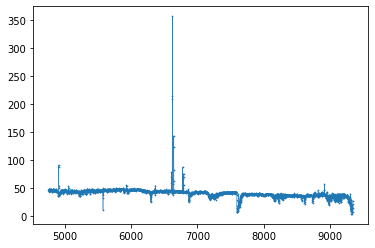

In [116]:
plt.plot(wave,median_arm,linewidth=0.5,alpha=0.95)
plt.scatter(wave,median_arm,s=0.5)

plt.fill_between(wave,median_arm - y_err, median_arm + y_err, color='blue', alpha=0.3, label="Uncertainty")
#plt.ylim(-5,100)
plt.xlim(halpha_obs-15,halpha_obs+15)
plt.plot(x_chopped,y_continuum_fit)
plt.title("Zoom around Halpha")

Fitted Amplitude (A): 237.73196393550393
Fitted Mean (mu): 6622.030050876312
Fitted Standard Deviation (sigma): 2.2772364397374196
Integral using Trapezoidal's rule: 1220.6318


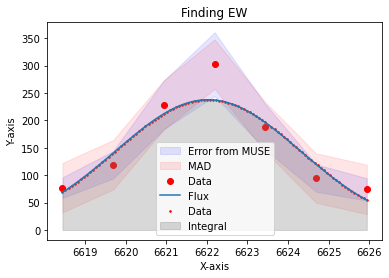

In [117]:
bound1=int(findWavelengths(wave, 6618)[1])
bound2=int(findWavelengths(wave, 6627)[1])

x = wave[bound1:bound2]
y = median_bulge[bound1:bound2]

y_err=np.nanmedian(ebulge[bound1:bound2], axis=(1, 2));
y_err2=np.full(len(y), mad(y))


initial_guess = initial_guess = [np.max(y), np.mean(x), np.std(x)]

params, covariance = curve_fit(gaussian, x, y, p0=initial_guess, sigma=y_err, absolute_sigma=True)
A_fit, mu_fit, sigma_fit = params


x_fit = np.linspace(np.min(x), np.max(x), 100)
y_fit = gaussian(x_fit, params[0], params[1], params[2])



# Print fitted parameters
print(f"Fitted Amplitude (A): {A_fit}")
print(f"Fitted Mean (mu): {mu_fit}")
print(f"Fitted Standard Deviation (sigma): {sigma_fit}")


##

xx = np.linspace(x_fit[0],x_fit[len(x_fit)-1], 100)  

#integral
integral = trapz(y_fit, xx)

print(f"Integral using Trapezoidal's rule: {integral:.4f}")

plt.fill_between(x,y - y_err, y + y_err, color='blue', alpha=0.1, label="Error from MUSE")

plt.fill_between(x,y - y_err2, y + y_err2, color='red', alpha=0.1, label="MAD")

plt.scatter(x, y, label="Data", color="red")
plt.plot(xx, y_fit, label="Flux")
plt.scatter(xx, y_fit, label="Data", color="red",s=2.4)
#plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")
plt.fill_between(xx, y_fit, alpha=0.3, color='gray', label="Integral")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Finding EW")
plt.show()


integrating smoothed spectra

In [131]:
A, mu, sigma = 1,2,3

#df_dA = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
df_dA = lambda x:  np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
#df_dmu = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) * (x - mu) / sigma**2
df_dmu = lambda x: A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) * (x - mu) / sigma**2
    
df_dsigma = lambda x: A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) * (x - mu)**2 / sigma**3
    
sigma_A = 1
sigma_mu = 1
sigma_sigma=1

err = lambda x: np.sqrt((df_dA(x) * sigma_A)**2 + (df_dmu(x) * sigma_mu)**2 + (df_dsigma(x) * sigma_sigma)**2)


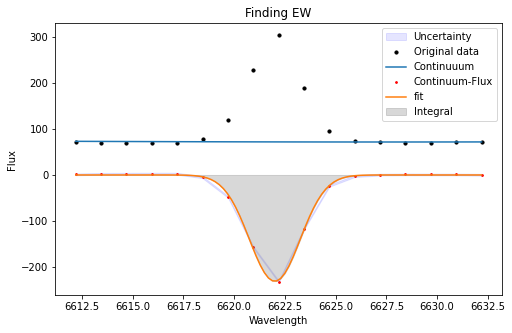

EW calculated through a parametric approach is ==  -10.077910414078875  +/-  0.6459865564910431


In [136]:
bound1=halpha_obs-40
bound2=halpha_obs+40

median_bulge_err=median_spectra_of_region(ebulge)

x,y,MUSEerr=chop_data(wave,median_bulge,bound1,bound2,median_bulge_err)

res=EW_parametric(x,y,MUSEerr,continuum_fit,continuum_err,method=0,plots=True)
print("EW calculated through a parametric approach is == ", res[0], " +/- ", res[1])

## fitting cont+peak together - parametric

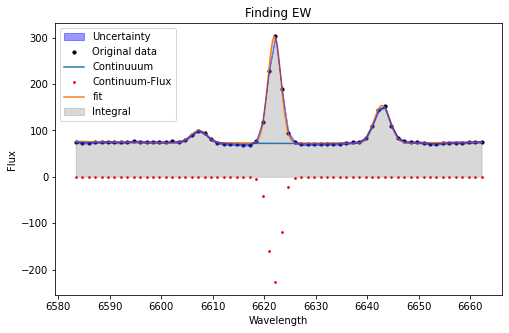

EW calculated through a parametric approach is ==  (-10.031259716383907, 0)


In [143]:
bound1=halpha_obs-40
bound2=halpha_obs+40

x,y=chop_data(wave,median_bulge,bound1,bound2)

    
print("EW calculated through a parametric approach is == ", EW_parametric(x,y,MUSEerr,continuum_fit,continuum_err,method=1,plots=True))

## picking region

In [144]:
x1=300
x2=420
y1=120
y2=200

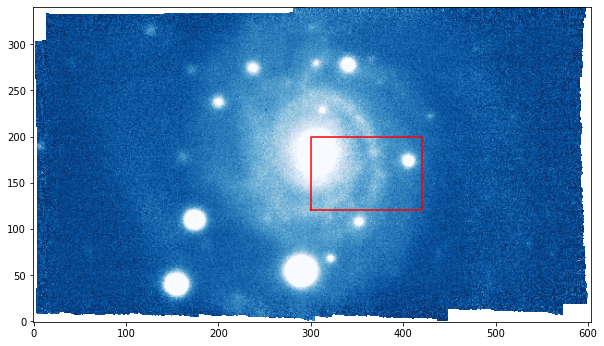

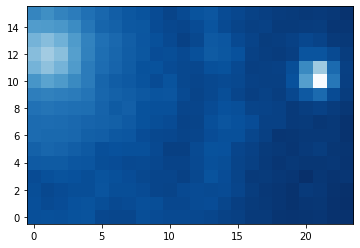

(8, 12)


In [145]:
region=cube[:,y1:y2,x1:x2]
region_err=ecube[:,y1:y2,x1:x2]
           
i=findWavelengths(wave, R)[1]


lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [x1, x1, x2, x2, x1]
y_coords = [y1, y2, y2, y1, y1] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline

plt.show()

plt.imshow(binning(region[10], 5),"Blues_r",origin='lower');

plt.show()

print(np.shape(binning(region[10], 10)))

In [146]:
binned_region=[]
binned_region_err=[]

for w in range(0,len(wave)):
    binned_region.append(binning(region[w], 5))
    binned_region_err.append(binning(region_err[w], 5))

In [147]:
binned_region=np.array(binned_region)
binned_region_err=np.array(binned_region_err)

MUSE_err=np.sqrt(np.median(binned_region_err, axis=(1, 2)))

## EW map - parametric

In [260]:
map=EW_map_parametric(binned_region,wave,MUSE_err,halpha_obs,plots=False)

EW = -18.154  +/- 0.635  at (i,j)= 0 , 0
EW = -12.364  +/- 0.564  at (i,j)= 0 , 1
EW = -10.402  +/- 0.708  at (i,j)= 0 , 2
EW = -18.624  +/- 0.750  at (i,j)= 0 , 3
EW = -27.997  +/- 1.092  at (i,j)= 0 , 4
EW = -25.911  +/- 0.907  at (i,j)= 0 , 5
EW = -16.853  +/- 0.560  at (i,j)= 0 , 6
EW = -9.412  +/- 0.461  at (i,j)= 0 , 7
EW = -7.915  +/- 0.596  at (i,j)= 0 , 8
EW = -9.312  +/- 0.486  at (i,j)= 0 , 9
EW = -8.907  +/- 0.527  at (i,j)= 0 , 10
EW = -6.832  +/- 0.337  at (i,j)= 0 , 11
EW = -4.738  +/- 0.440  at (i,j)= 0 , 12
EW = -5.886  +/- 0.487  at (i,j)= 0 , 13
EW = -9.284  +/- 0.421  at (i,j)= 0 , 14
EW = -11.367  +/- 0.537  at (i,j)= 0 , 15
EW = -19.648  +/- 0.715  at (i,j)= 1 , 0
EW = -13.639  +/- 0.804  at (i,j)= 1 , 1
EW = -12.253  +/- 0.838  at (i,j)= 1 , 2
EW = -15.695  +/- 0.882  at (i,j)= 1 , 3
EW = -20.305  +/- 0.751  at (i,j)= 1 , 4
EW = -25.408  +/- 0.602  at (i,j)= 1 , 5
EW = -19.649  +/- 0.742  at (i,j)= 1 , 6
EW = -14.447  +/- 0.484  at (i,j)= 1 , 7
EW = -10.842  +/- 

EW = -25.463  +/- 0.955  at (i,j)= 13 , 11
EW = -31.281  +/- 0.990  at (i,j)= 13 , 12
EW = -25.552  +/- 1.180  at (i,j)= 13 , 13
EW = -16.047  +/- 0.814  at (i,j)= 13 , 14
EW = -11.605  +/- 0.783  at (i,j)= 13 , 15
EW = -5.409  +/- 0.680  at (i,j)= 14 , 0
EW = -5.890  +/- 0.685  at (i,j)= 14 , 1
EW = -8.572  +/- 0.767  at (i,j)= 14 , 2
EW = -13.929  +/- 0.742  at (i,j)= 14 , 3
EW = -23.825  +/- 0.784  at (i,j)= 14 , 4
EW = -36.867  +/- 0.997  at (i,j)= 14 , 5
EW = -35.904  +/- 0.775  at (i,j)= 14 , 6
EW = -27.392  +/- 0.814  at (i,j)= 14 , 7
EW = -29.598  +/- 0.887  at (i,j)= 14 , 8
EW = -32.721  +/- 1.287  at (i,j)= 14 , 9
EW = -25.909  +/- 0.919  at (i,j)= 14 , 10
EW = -16.917  +/- 0.805  at (i,j)= 14 , 11
EW = -13.333  +/- 0.631  at (i,j)= 14 , 12
EW = -14.991  +/- 0.553  at (i,j)= 14 , 13
EW = -14.079  +/- 0.596  at (i,j)= 14 , 14
EW = -8.819  +/- 0.783  at (i,j)= 14 , 15
EW = -7.876  +/- 1.102  at (i,j)= 15 , 0
EW = -12.004  +/- 0.970  at (i,j)= 15 , 1
EW = -17.118  +/- 1.146  at 

In [261]:
wavelen,index=findWavelengths(wave, halpha_obs)

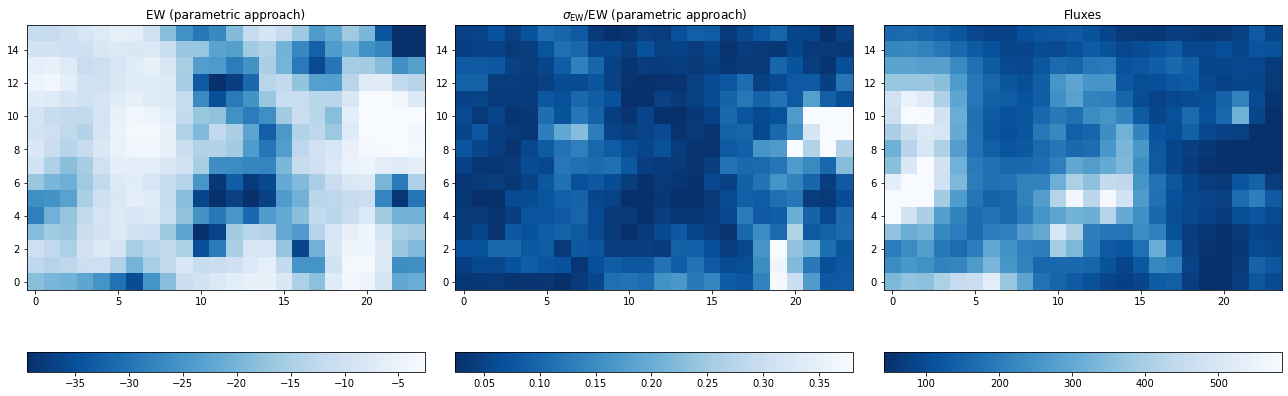

In [264]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data = np.transpose(abs(map[1] / map[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[index]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

In [102]:
#EW_map_parametric(binned_region,wave,MUSE_err,halpha_obs,method=1)

## EW - non parametric approach

In [103]:
x_chopped,y_chopped=chop_data(wave,binned_region[:,10,10],halpha_obs-50,halpha_obs+50)

# smooth data
y_smooth=smooth_spectra(y_chopped,kernel_size=3)

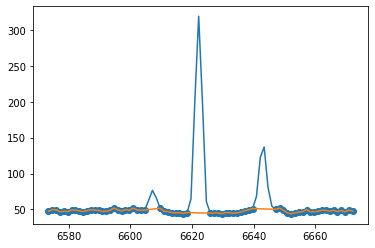

In [104]:
plt.plot(x_chopped,y_smooth)
x,y=filterout_peaks(x_chopped,y_smooth)
plt.scatter(x,y)

kernel = cosine_kernel(3)
cont = convolve(y, kernel, mode='same')

plt.plot(x,cont)

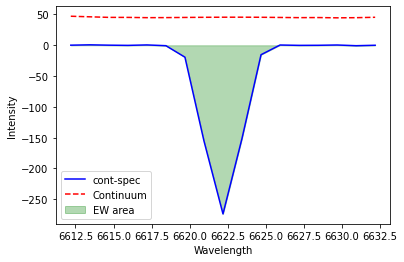

Integral of area over continuum divided by continuum: -16.86


In [106]:
max=np.argmax(y_smooth)
bound1=x_chopped[max]-10
bound2=x_chopped[max]+10
x,y=chop_data(x_chopped,y_smooth,bound1,bound2)


# continuum
x_cont,y_cont=filterout_peaks(x_chopped,y_smooth)

kernel = cosine_kernel(4)
cont = convolve(y_cont, kernel, mode='same')
interp=interp1d(x_cont, cont, kind='cubic')



continuum = interp(x)



# Compute the excess intensity above the continuum
excess_intensity = (continuum-y)/continuum

# Integrate the excess intensity (area over the continuum)
area_over_continuum = trapz(excess_intensity, x)
#continuum_summed = simps(continuum_fit(x), x)


plt.plot(x, continuum-y, label="cont-spec", color="blue")
plt.plot(x, continuum, label="Continuum", linestyle="dashed", color="red")
plt.fill_between(x, continuum-y, 0, alpha=0.3, color="green", label="EW area")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.legend()
plt.show()

print(f"Integral of area over continuum divided by continuum: {area_over_continuum:.2f}")


## EW map - non parametric approach

In [267]:
map_NP=EW_map_non_parametric(binned_region,wave,halpha_obs,kernel_size=3,plots=False)

Integral of area over continuum divided by continuum: -18.818 +/- 0.053 at (i,j)= 0 ,  0
Integral of area over continuum divided by continuum: -14.152 +/- 0.063 at (i,j)= 0 ,  1
Integral of area over continuum divided by continuum: -10.804 +/- 0.049 at (i,j)= 0 ,  2
Integral of area over continuum divided by continuum: -19.425 +/- 0.056 at (i,j)= 0 ,  3
Integral of area over continuum divided by continuum: -26.446 +/- 0.109 at (i,j)= 0 ,  4
Integral of area over continuum divided by continuum: -24.069 +/- 0.133 at (i,j)= 0 ,  5
Integral of area over continuum divided by continuum: -15.774 +/- 0.038 at (i,j)= 0 ,  6
Integral of area over continuum divided by continuum: -8.819 +/- 0.027 at (i,j)= 0 ,  7
Integral of area over continuum divided by continuum: -7.284 +/- 0.046 at (i,j)= 0 ,  8
Integral of area over continuum divided by continuum: -7.917 +/- 0.026 at (i,j)= 0 ,  9
Integral of area over continuum divided by continuum: -9.146 +/- 0.030 at (i,j)= 0 ,  10
Integral of area over co

Integral of area over continuum divided by continuum: -11.142 +/- 0.056 at (i,j)= 8 ,  6
Integral of area over continuum divided by continuum: -8.505 +/- 0.064 at (i,j)= 8 ,  7
Integral of area over continuum divided by continuum: -4.738 +/- 0.042 at (i,j)= 8 ,  8
Integral of area over continuum divided by continuum: -4.760 +/- 0.037 at (i,j)= 8 ,  9
Integral of area over continuum divided by continuum: -6.340 +/- 0.035 at (i,j)= 8 ,  10
Integral of area over continuum divided by continuum: -7.617 +/- 0.034 at (i,j)= 8 ,  11
Integral of area over continuum divided by continuum: -7.547 +/- 0.035 at (i,j)= 8 ,  12
Integral of area over continuum divided by continuum: -8.094 +/- 0.055 at (i,j)= 8 ,  13
Integral of area over continuum divided by continuum: -11.129 +/- 0.043 at (i,j)= 8 ,  14
Integral of area over continuum divided by continuum: -15.684 +/- 0.082 at (i,j)= 8 ,  15
Integral of area over continuum divided by continuum: -11.240 +/- 0.075 at (i,j)= 9 ,  0
Integral of area over 

Integral of area over continuum divided by continuum: -25.739 +/- 0.075 at (i,j)= 14 ,  10
Integral of area over continuum divided by continuum: -17.610 +/- 0.069 at (i,j)= 14 ,  11
Integral of area over continuum divided by continuum: -12.599 +/- 0.055 at (i,j)= 14 ,  12
Integral of area over continuum divided by continuum: -13.862 +/- 0.060 at (i,j)= 14 ,  13
Integral of area over continuum divided by continuum: -12.638 +/- 0.067 at (i,j)= 14 ,  14
Integral of area over continuum divided by continuum: -8.876 +/- 0.060 at (i,j)= 14 ,  15
Integral of area over continuum divided by continuum: -7.281 +/- 0.073 at (i,j)= 15 ,  0
Integral of area over continuum divided by continuum: -11.851 +/- 0.049 at (i,j)= 15 ,  1
Integral of area over continuum divided by continuum: -17.395 +/- 0.052 at (i,j)= 15 ,  2
Integral of area over continuum divided by continuum: -19.694 +/- 0.110 at (i,j)= 15 ,  3
Integral of area over continuum divided by continuum: -19.010 +/- 0.105 at (i,j)= 15 ,  4
Integr

Integral of area over continuum divided by continuum: -22.501 +/- 0.130 at (i,j)= 20 ,  14
Integral of area over continuum divided by continuum: -17.971 +/- 0.077 at (i,j)= 20 ,  15
Integral of area over continuum divided by continuum: -10.769 +/- 0.164 at (i,j)= 21 ,  0
Integral of area over continuum divided by continuum: -7.516 +/- 0.046 at (i,j)= 21 ,  1
Integral of area over continuum divided by continuum: -8.133 +/- 0.117 at (i,j)= 21 ,  2
Integral of area over continuum divided by continuum: -8.439 +/- 0.053 at (i,j)= 21 ,  3
Integral of area over continuum divided by continuum: -13.038 +/- 0.116 at (i,j)= 21 ,  4
Integral of area over continuum divided by continuum: -29.075 +/- 0.126 at (i,j)= 21 ,  5
Integral of area over continuum divided by continuum: -15.528 +/- 0.161 at (i,j)= 21 ,  6
Integral of area over continuum divided by continuum: -6.134 +/- 0.054 at (i,j)= 21 ,  7
Integral of area over continuum divided by continuum: -2.725 +/- 0.046 at (i,j)= 21 ,  8
Integral of a

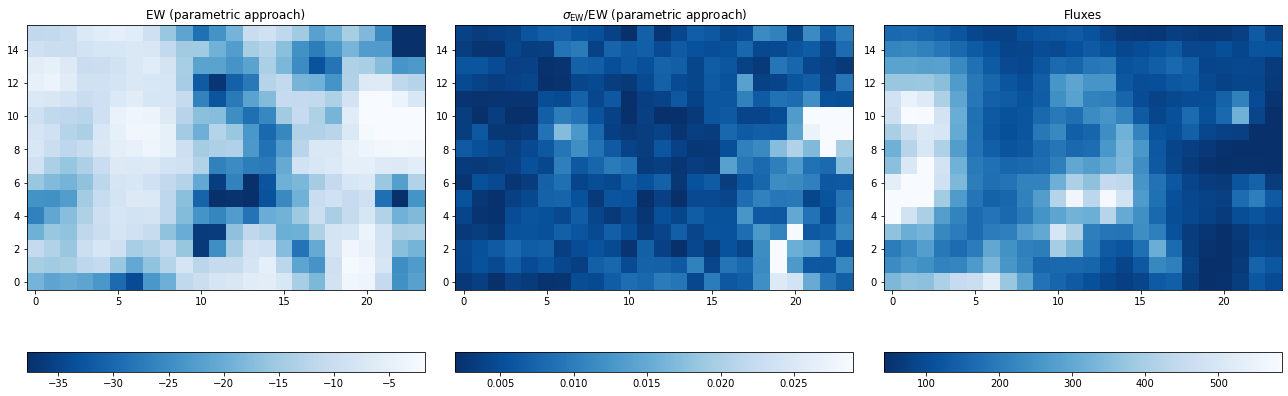

In [268]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_NP[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_NP[1]/map_NP[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[index]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

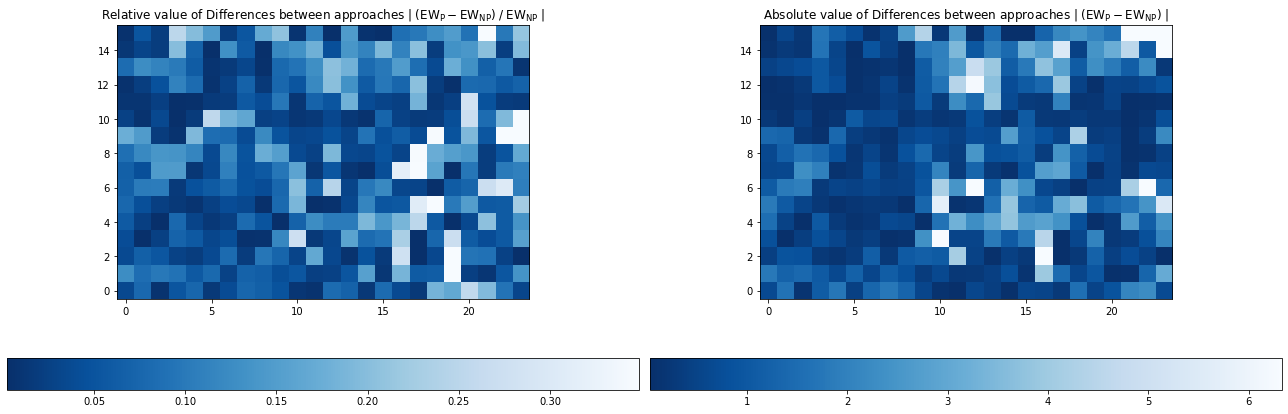

In [284]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

map_diff=abs((map_NP[0]-map[0])/map_NP[0])

data= np.transpose(map_diff)
lo,up = np.nanpercentile(data,2),np.nanpercentile(data,98)
cmap = plt.cm.Blues_r.copy()

im1=ax[0].imshow(data,cmap=cmap,origin='lower',clim=(lo,up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("Relative value of Differences between approaches $|\; (\mathrm{EW_{P}}-\mathrm{EW_{NP}}) \; / \; \mathrm{EW_{NP}}\; |$")


###
map_diff=abs((map_NP[0]-map[0]))

data= np.transpose(map_diff)
lo,up = np.nanpercentile(data,2),np.nanpercentile(data,98)
cmap = plt.cm.Blues_r.copy()


im2=ax[1].imshow(data,cmap=cmap,origin='lower',clim=(lo,up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title("Absolute value of Differences between approaches $|\; (\mathrm{EW_{P}}-\mathrm{EW_{NP}}) \;|$")

plt.tight_layout()
plt.show()

In [286]:
map_nonbinned_NP=EW_map_non_parametric(region,wave,halpha_obs,kernel_size=3,plots=False)

Integral of area over continuum divided by continuum: -24.935 +/- 0.231 at (i,j)= 0 ,  0
Integral of area over continuum divided by continuum: -17.694 +/- 0.206 at (i,j)= 0 ,  1
Integral of area over continuum divided by continuum: -16.214 +/- 0.235 at (i,j)= 0 ,  2
Integral of area over continuum divided by continuum: -13.013 +/- 0.161 at (i,j)= 0 ,  3
Integral of area over continuum divided by continuum: -10.802 +/- 0.174 at (i,j)= 0 ,  4
Integral of area over continuum divided by continuum: -10.750 +/- 0.215 at (i,j)= 0 ,  5
Integral of area over continuum divided by continuum: -11.587 +/- 0.153 at (i,j)= 0 ,  6
Integral of area over continuum divided by continuum: -10.415 +/- 0.182 at (i,j)= 0 ,  7
Integral of area over continuum divided by continuum: -8.898 +/- 0.082 at (i,j)= 0 ,  8
Integral of area over continuum divided by continuum: -8.790 +/- 0.136 at (i,j)= 0 ,  9
Integral of area over continuum divided by continuum: -6.781 +/- 0.163 at (i,j)= 0 ,  10
Integral of area over c

Integral of area over continuum divided by continuum: -8.145 +/- 0.078 at (i,j)= 1 ,  42
Integral of area over continuum divided by continuum: -6.415 +/- 0.090 at (i,j)= 1 ,  43
Integral of area over continuum divided by continuum: -6.844 +/- 0.080 at (i,j)= 1 ,  44
Integral of area over continuum divided by continuum: -7.383 +/- 0.058 at (i,j)= 1 ,  45
Integral of area over continuum divided by continuum: -7.802 +/- 0.081 at (i,j)= 1 ,  46
Integral of area over continuum divided by continuum: -8.408 +/- 0.077 at (i,j)= 1 ,  47
Integral of area over continuum divided by continuum: -8.063 +/- 0.055 at (i,j)= 1 ,  48
Integral of area over continuum divided by continuum: -9.924 +/- 0.064 at (i,j)= 1 ,  49
Integral of area over continuum divided by continuum: -7.666 +/- 0.088 at (i,j)= 1 ,  50
Integral of area over continuum divided by continuum: -9.611 +/- 0.057 at (i,j)= 1 ,  51
Integral of area over continuum divided by continuum: -6.596 +/- 0.048 at (i,j)= 1 ,  52
Integral of area over

Integral of area over continuum divided by continuum: -6.721 +/- 0.065 at (i,j)= 2 ,  70
Integral of area over continuum divided by continuum: -7.050 +/- 0.060 at (i,j)= 2 ,  71
Integral of area over continuum divided by continuum: -8.743 +/- 0.062 at (i,j)= 2 ,  72
Integral of area over continuum divided by continuum: -8.718 +/- 0.114 at (i,j)= 2 ,  73
Integral of area over continuum divided by continuum: -8.724 +/- 0.047 at (i,j)= 2 ,  74
Integral of area over continuum divided by continuum: -9.299 +/- 0.050 at (i,j)= 2 ,  75
Integral of area over continuum divided by continuum: -12.889 +/- 0.105 at (i,j)= 2 ,  76
Integral of area over continuum divided by continuum: -11.665 +/- 0.037 at (i,j)= 2 ,  77
Integral of area over continuum divided by continuum: -11.951 +/- 0.060 at (i,j)= 2 ,  78
Integral of area over continuum divided by continuum: -11.056 +/- 0.085 at (i,j)= 2 ,  79
Integral of area over continuum divided by continuum: -14.393 +/- 0.226 at (i,j)= 3 ,  0
Integral of area 

Integral of area over continuum divided by continuum: -19.787 +/- 0.166 at (i,j)= 4 ,  30
Integral of area over continuum divided by continuum: -14.878 +/- 0.253 at (i,j)= 4 ,  31
Integral of area over continuum divided by continuum: -14.209 +/- 0.090 at (i,j)= 4 ,  32
Integral of area over continuum divided by continuum: -11.824 +/- 0.152 at (i,j)= 4 ,  33
Integral of area over continuum divided by continuum: -12.498 +/- 0.100 at (i,j)= 4 ,  34
Integral of area over continuum divided by continuum: -11.056 +/- 0.100 at (i,j)= 4 ,  35
Integral of area over continuum divided by continuum: -8.749 +/- 0.105 at (i,j)= 4 ,  36
Integral of area over continuum divided by continuum: -9.060 +/- 0.078 at (i,j)= 4 ,  37
Integral of area over continuum divided by continuum: -8.334 +/- 0.071 at (i,j)= 4 ,  38
Integral of area over continuum divided by continuum: -8.379 +/- 0.051 at (i,j)= 4 ,  39
Integral of area over continuum divided by continuum: -8.533 +/- 0.044 at (i,j)= 4 ,  40
Integral of are

Integral of area over continuum divided by continuum: -4.882 +/- 0.036 at (i,j)= 5 ,  66
Integral of area over continuum divided by continuum: -4.969 +/- 0.043 at (i,j)= 5 ,  67
Integral of area over continuum divided by continuum: -5.804 +/- 0.056 at (i,j)= 5 ,  68
Integral of area over continuum divided by continuum: -5.570 +/- 0.037 at (i,j)= 5 ,  69
Integral of area over continuum divided by continuum: -6.397 +/- 0.070 at (i,j)= 5 ,  70
Integral of area over continuum divided by continuum: -7.035 +/- 0.054 at (i,j)= 5 ,  71
Integral of area over continuum divided by continuum: -7.451 +/- 0.079 at (i,j)= 5 ,  72
Integral of area over continuum divided by continuum: -12.212 +/- 0.091 at (i,j)= 5 ,  73
Integral of area over continuum divided by continuum: -12.858 +/- 0.118 at (i,j)= 5 ,  74
Integral of area over continuum divided by continuum: -12.305 +/- 0.108 at (i,j)= 5 ,  75
Integral of area over continuum divided by continuum: -10.152 +/- 0.085 at (i,j)= 5 ,  76
Integral of area 

Integral of area over continuum divided by continuum: -15.298 +/- 0.168 at (i,j)= 7 ,  33
Integral of area over continuum divided by continuum: -14.499 +/- 0.108 at (i,j)= 7 ,  34
Integral of area over continuum divided by continuum: -14.486 +/- 0.107 at (i,j)= 7 ,  35
Integral of area over continuum divided by continuum: -13.920 +/- 0.102 at (i,j)= 7 ,  36
Integral of area over continuum divided by continuum: -12.976 +/- 0.107 at (i,j)= 7 ,  37
Integral of area over continuum divided by continuum: -15.215 +/- 0.108 at (i,j)= 7 ,  38
Integral of area over continuum divided by continuum: -12.411 +/- 0.091 at (i,j)= 7 ,  39
Integral of area over continuum divided by continuum: -11.562 +/- 0.087 at (i,j)= 7 ,  40
Integral of area over continuum divided by continuum: -10.171 +/- 0.060 at (i,j)= 7 ,  41
Integral of area over continuum divided by continuum: -8.846 +/- 0.060 at (i,j)= 7 ,  42
Integral of area over continuum divided by continuum: -7.061 +/- 0.086 at (i,j)= 7 ,  43
Integral of 

Integral of area over continuum divided by continuum: -11.897 +/- 0.061 at (i,j)= 8 ,  74
Integral of area over continuum divided by continuum: -9.267 +/- 0.066 at (i,j)= 8 ,  75
Integral of area over continuum divided by continuum: -12.952 +/- 0.105 at (i,j)= 8 ,  76
Integral of area over continuum divided by continuum: -10.884 +/- 0.110 at (i,j)= 8 ,  77
Integral of area over continuum divided by continuum: -10.217 +/- 0.094 at (i,j)= 8 ,  78
Integral of area over continuum divided by continuum: -8.104 +/- 0.098 at (i,j)= 8 ,  79
Integral of area over continuum divided by continuum: -27.840 +/- 0.270 at (i,j)= 9 ,  0
Integral of area over continuum divided by continuum: -32.499 +/- 0.627 at (i,j)= 9 ,  1
Integral of area over continuum divided by continuum: -24.750 +/- 0.249 at (i,j)= 9 ,  2
Integral of area over continuum divided by continuum: -23.053 +/- 0.431 at (i,j)= 9 ,  3
Integral of area over continuum divided by continuum: -15.673 +/- 0.180 at (i,j)= 9 ,  4
Integral of area 

Integral of area over continuum divided by continuum: -9.809 +/- 0.090 at (i,j)= 10 ,  44
Integral of area over continuum divided by continuum: -9.356 +/- 0.084 at (i,j)= 10 ,  45
Integral of area over continuum divided by continuum: -8.376 +/- 0.120 at (i,j)= 10 ,  46
Integral of area over continuum divided by continuum: -9.501 +/- 0.091 at (i,j)= 10 ,  47
Integral of area over continuum divided by continuum: -10.582 +/- 0.075 at (i,j)= 10 ,  48
Integral of area over continuum divided by continuum: -9.821 +/- 0.099 at (i,j)= 10 ,  49
Integral of area over continuum divided by continuum: -11.376 +/- 0.055 at (i,j)= 10 ,  50
Integral of area over continuum divided by continuum: -11.617 +/- 0.075 at (i,j)= 10 ,  51
Integral of area over continuum divided by continuum: -11.355 +/- 0.087 at (i,j)= 10 ,  52
Integral of area over continuum divided by continuum: -10.615 +/- 0.100 at (i,j)= 10 ,  53
Integral of area over continuum divided by continuum: -8.695 +/- 0.084 at (i,j)= 10 ,  54
Integ

Integral of area over continuum divided by continuum: -19.454 +/- 0.245 at (i,j)= 12 ,  14
Integral of area over continuum divided by continuum: -17.316 +/- 0.183 at (i,j)= 12 ,  15
Integral of area over continuum divided by continuum: -21.573 +/- 0.357 at (i,j)= 12 ,  16
Integral of area over continuum divided by continuum: -15.618 +/- 0.178 at (i,j)= 12 ,  17
Integral of area over continuum divided by continuum: -13.650 +/- 0.190 at (i,j)= 12 ,  18
Integral of area over continuum divided by continuum: -17.663 +/- 0.165 at (i,j)= 12 ,  19
Integral of area over continuum divided by continuum: -15.059 +/- 0.066 at (i,j)= 12 ,  20
Integral of area over continuum divided by continuum: -15.315 +/- 0.163 at (i,j)= 12 ,  21
Integral of area over continuum divided by continuum: -14.889 +/- 0.143 at (i,j)= 12 ,  22
Integral of area over continuum divided by continuum: -17.915 +/- 0.105 at (i,j)= 12 ,  23
Integral of area over continuum divided by continuum: -18.905 +/- 0.115 at (i,j)= 12 ,  24

Integral of area over continuum divided by continuum: -10.481 +/- 0.157 at (i,j)= 13 ,  44
Integral of area over continuum divided by continuum: -11.808 +/- 0.109 at (i,j)= 13 ,  45
Integral of area over continuum divided by continuum: -10.060 +/- 0.118 at (i,j)= 13 ,  46
Integral of area over continuum divided by continuum: -10.453 +/- 0.091 at (i,j)= 13 ,  47
Integral of area over continuum divided by continuum: -10.712 +/- 0.142 at (i,j)= 13 ,  48
Integral of area over continuum divided by continuum: -10.627 +/- 0.115 at (i,j)= 13 ,  49
Integral of area over continuum divided by continuum: -10.176 +/- 0.111 at (i,j)= 13 ,  50
Integral of area over continuum divided by continuum: -11.033 +/- 0.127 at (i,j)= 13 ,  51
Integral of area over continuum divided by continuum: -13.081 +/- 0.102 at (i,j)= 13 ,  52
Integral of area over continuum divided by continuum: -11.334 +/- 0.052 at (i,j)= 13 ,  53
Integral of area over continuum divided by continuum: -11.020 +/- 0.079 at (i,j)= 13 ,  54

Integral of area over continuum divided by continuum: -22.156 +/- 0.166 at (i,j)= 15 ,  1
Integral of area over continuum divided by continuum: -19.861 +/- 0.118 at (i,j)= 15 ,  2
Integral of area over continuum divided by continuum: -28.285 +/- 0.367 at (i,j)= 15 ,  3
Integral of area over continuum divided by continuum: -21.422 +/- 0.380 at (i,j)= 15 ,  4
Integral of area over continuum divided by continuum: -10.273 +/- 0.179 at (i,j)= 15 ,  5
Integral of area over continuum divided by continuum: -7.206 +/- 0.143 at (i,j)= 15 ,  6
Integral of area over continuum divided by continuum: -9.214 +/- 0.192 at (i,j)= 15 ,  7
Integral of area over continuum divided by continuum: -12.174 +/- 0.270 at (i,j)= 15 ,  8
Integral of area over continuum divided by continuum: -6.132 +/- 0.179 at (i,j)= 15 ,  9
Integral of area over continuum divided by continuum: -5.996 +/- 0.110 at (i,j)= 15 ,  10
Integral of area over continuum divided by continuum: -9.638 +/- 0.128 at (i,j)= 15 ,  11
Integral of a

Integral of area over continuum divided by continuum: -14.691 +/- 0.085 at (i,j)= 16 ,  36
Integral of area over continuum divided by continuum: -14.205 +/- 0.111 at (i,j)= 16 ,  37
Integral of area over continuum divided by continuum: -11.978 +/- 0.148 at (i,j)= 16 ,  38
Integral of area over continuum divided by continuum: -11.808 +/- 0.119 at (i,j)= 16 ,  39
Integral of area over continuum divided by continuum: -11.893 +/- 0.121 at (i,j)= 16 ,  40
Integral of area over continuum divided by continuum: -10.791 +/- 0.052 at (i,j)= 16 ,  41
Integral of area over continuum divided by continuum: -9.620 +/- 0.149 at (i,j)= 16 ,  42
Integral of area over continuum divided by continuum: -10.086 +/- 0.092 at (i,j)= 16 ,  43
Integral of area over continuum divided by continuum: -10.866 +/- 0.090 at (i,j)= 16 ,  44
Integral of area over continuum divided by continuum: -10.917 +/- 0.147 at (i,j)= 16 ,  45
Integral of area over continuum divided by continuum: -11.873 +/- 0.111 at (i,j)= 16 ,  46


Integral of area over continuum divided by continuum: -8.098 +/- 0.067 at (i,j)= 17 ,  75
Integral of area over continuum divided by continuum: -7.536 +/- 0.083 at (i,j)= 17 ,  76
Integral of area over continuum divided by continuum: -6.808 +/- 0.078 at (i,j)= 17 ,  77
Integral of area over continuum divided by continuum: -6.072 +/- 0.086 at (i,j)= 17 ,  78
Integral of area over continuum divided by continuum: -7.072 +/- 0.062 at (i,j)= 17 ,  79
Integral of area over continuum divided by continuum: -27.099 +/- 0.359 at (i,j)= 18 ,  0
Integral of area over continuum divided by continuum: -31.807 +/- 0.462 at (i,j)= 18 ,  1
Integral of area over continuum divided by continuum: -18.482 +/- 0.231 at (i,j)= 18 ,  2
Integral of area over continuum divided by continuum: -14.640 +/- 0.191 at (i,j)= 18 ,  3
Integral of area over continuum divided by continuum: -14.622 +/- 0.126 at (i,j)= 18 ,  4
Integral of area over continuum divided by continuum: -7.790 +/- 0.198 at (i,j)= 18 ,  5
Integral of

Integral of area over continuum divided by continuum: -9.330 +/- 0.070 at (i,j)= 19 ,  25
Integral of area over continuum divided by continuum: -10.048 +/- 0.168 at (i,j)= 19 ,  26
Integral of area over continuum divided by continuum: -9.690 +/- 0.118 at (i,j)= 19 ,  27
Integral of area over continuum divided by continuum: -11.440 +/- 0.101 at (i,j)= 19 ,  28
Integral of area over continuum divided by continuum: -12.090 +/- 0.131 at (i,j)= 19 ,  29
Integral of area over continuum divided by continuum: -16.176 +/- 0.237 at (i,j)= 19 ,  30
Integral of area over continuum divided by continuum: -16.128 +/- 0.135 at (i,j)= 19 ,  31
Integral of area over continuum divided by continuum: -13.837 +/- 0.199 at (i,j)= 19 ,  32
Integral of area over continuum divided by continuum: -15.938 +/- 0.132 at (i,j)= 19 ,  33
Integral of area over continuum divided by continuum: -15.760 +/- 0.106 at (i,j)= 19 ,  34
Integral of area over continuum divided by continuum: -14.974 +/- 0.081 at (i,j)= 19 ,  35
I

Integral of area over continuum divided by continuum: -8.226 +/- 0.106 at (i,j)= 20 ,  40
Integral of area over continuum divided by continuum: -6.862 +/- 0.083 at (i,j)= 20 ,  41
Integral of area over continuum divided by continuum: -6.697 +/- 0.109 at (i,j)= 20 ,  42
Integral of area over continuum divided by continuum: -9.179 +/- 0.073 at (i,j)= 20 ,  43
Integral of area over continuum divided by continuum: -9.321 +/- 0.054 at (i,j)= 20 ,  44
Integral of area over continuum divided by continuum: -7.892 +/- 0.093 at (i,j)= 20 ,  45
Integral of area over continuum divided by continuum: -7.761 +/- 0.093 at (i,j)= 20 ,  46
Integral of area over continuum divided by continuum: -8.654 +/- 0.087 at (i,j)= 20 ,  47
Integral of area over continuum divided by continuum: -8.184 +/- 0.109 at (i,j)= 20 ,  48
Integral of area over continuum divided by continuum: -8.123 +/- 0.097 at (i,j)= 20 ,  49
Integral of area over continuum divided by continuum: -9.186 +/- 0.129 at (i,j)= 20 ,  50
Integral o

Integral of area over continuum divided by continuum: -7.013 +/- 0.062 at (i,j)= 21 ,  76
Integral of area over continuum divided by continuum: -6.205 +/- 0.039 at (i,j)= 21 ,  77
Integral of area over continuum divided by continuum: -5.208 +/- 0.103 at (i,j)= 21 ,  78
Integral of area over continuum divided by continuum: -5.161 +/- 0.051 at (i,j)= 21 ,  79
Integral of area over continuum divided by continuum: -40.637 +/- 0.446 at (i,j)= 22 ,  0
Integral of area over continuum divided by continuum: -27.229 +/- 0.204 at (i,j)= 22 ,  1
Integral of area over continuum divided by continuum: -22.308 +/- 0.179 at (i,j)= 22 ,  2
Integral of area over continuum divided by continuum: -14.834 +/- 0.287 at (i,j)= 22 ,  3
Integral of area over continuum divided by continuum: -15.629 +/- 0.133 at (i,j)= 22 ,  4
Integral of area over continuum divided by continuum: -15.115 +/- 0.177 at (i,j)= 22 ,  5
Integral of area over continuum divided by continuum: -7.269 +/- 0.099 at (i,j)= 22 ,  6
Integral of

Integral of area over continuum divided by continuum: -5.670 +/- 0.105 at (i,j)= 23 ,  40
Integral of area over continuum divided by continuum: -5.125 +/- 0.092 at (i,j)= 23 ,  41
Integral of area over continuum divided by continuum: -7.939 +/- 0.110 at (i,j)= 23 ,  42
Integral of area over continuum divided by continuum: -6.407 +/- 0.140 at (i,j)= 23 ,  43
Integral of area over continuum divided by continuum: -5.383 +/- 0.108 at (i,j)= 23 ,  44
Integral of area over continuum divided by continuum: -6.813 +/- 0.153 at (i,j)= 23 ,  45
Integral of area over continuum divided by continuum: -6.990 +/- 0.063 at (i,j)= 23 ,  46
Integral of area over continuum divided by continuum: -7.398 +/- 0.079 at (i,j)= 23 ,  47
Integral of area over continuum divided by continuum: -5.989 +/- 0.107 at (i,j)= 23 ,  48
Integral of area over continuum divided by continuum: -6.766 +/- 0.067 at (i,j)= 23 ,  49
Integral of area over continuum divided by continuum: -6.329 +/- 0.078 at (i,j)= 23 ,  50
Integral o

Integral of area over continuum divided by continuum: -30.294 +/- 0.165 at (i,j)= 25 ,  1
Integral of area over continuum divided by continuum: -26.599 +/- 0.331 at (i,j)= 25 ,  2
Integral of area over continuum divided by continuum: -26.894 +/- 0.317 at (i,j)= 25 ,  3
Integral of area over continuum divided by continuum: -20.160 +/- 0.218 at (i,j)= 25 ,  4
Integral of area over continuum divided by continuum: -14.025 +/- 0.151 at (i,j)= 25 ,  5
Integral of area over continuum divided by continuum: -13.893 +/- 0.179 at (i,j)= 25 ,  6
Integral of area over continuum divided by continuum: -10.059 +/- 0.127 at (i,j)= 25 ,  7
Integral of area over continuum divided by continuum: -5.940 +/- 0.162 at (i,j)= 25 ,  8
Integral of area over continuum divided by continuum: -4.766 +/- 0.135 at (i,j)= 25 ,  9
Integral of area over continuum divided by continuum: -5.805 +/- 0.148 at (i,j)= 25 ,  10
Integral of area over continuum divided by continuum: -5.827 +/- 0.118 at (i,j)= 25 ,  11
Integral of 

Integral of area over continuum divided by continuum: -5.079 +/- 0.194 at (i,j)= 26 ,  16
Integral of area over continuum divided by continuum: -4.724 +/- 0.194 at (i,j)= 26 ,  17
Integral of area over continuum divided by continuum: -4.390 +/- 0.144 at (i,j)= 26 ,  18
Integral of area over continuum divided by continuum: -9.405 +/- 0.230 at (i,j)= 26 ,  19
Integral of area over continuum divided by continuum: -6.636 +/- 0.093 at (i,j)= 26 ,  20
Integral of area over continuum divided by continuum: -5.038 +/- 0.119 at (i,j)= 26 ,  21
Integral of area over continuum divided by continuum: -6.956 +/- 0.137 at (i,j)= 26 ,  22
Integral of area over continuum divided by continuum: -12.560 +/- 0.335 at (i,j)= 26 ,  23
Integral of area over continuum divided by continuum: -13.055 +/- 0.212 at (i,j)= 26 ,  24
Integral of area over continuum divided by continuum: -6.434 +/- 0.075 at (i,j)= 26 ,  25
Integral of area over continuum divided by continuum: -9.486 +/- 0.174 at (i,j)= 26 ,  26
Integral

Integral of area over continuum divided by continuum: -5.974 +/- 0.118 at (i,j)= 27 ,  37
Integral of area over continuum divided by continuum: -7.610 +/- 0.206 at (i,j)= 27 ,  38
Integral of area over continuum divided by continuum: -7.142 +/- 0.172 at (i,j)= 27 ,  39
Integral of area over continuum divided by continuum: -5.030 +/- 0.112 at (i,j)= 27 ,  40
Integral of area over continuum divided by continuum: -4.712 +/- 0.086 at (i,j)= 27 ,  41
Integral of area over continuum divided by continuum: -4.123 +/- 0.084 at (i,j)= 27 ,  42
Integral of area over continuum divided by continuum: -3.348 +/- 0.091 at (i,j)= 27 ,  43
Integral of area over continuum divided by continuum: -4.752 +/- 0.132 at (i,j)= 27 ,  44
Integral of area over continuum divided by continuum: -4.437 +/- 0.087 at (i,j)= 27 ,  45
Integral of area over continuum divided by continuum: -4.246 +/- 0.061 at (i,j)= 27 ,  46
Integral of area over continuum divided by continuum: -4.933 +/- 0.099 at (i,j)= 27 ,  47
Integral o

Integral of area over continuum divided by continuum: -8.150 +/- 0.160 at (i,j)= 29 ,  31
Integral of area over continuum divided by continuum: -6.635 +/- 0.125 at (i,j)= 29 ,  32
Integral of area over continuum divided by continuum: -7.230 +/- 0.139 at (i,j)= 29 ,  33
Integral of area over continuum divided by continuum: -7.354 +/- 0.118 at (i,j)= 29 ,  34
Integral of area over continuum divided by continuum: -5.871 +/- 0.143 at (i,j)= 29 ,  35
Integral of area over continuum divided by continuum: -7.725 +/- 0.197 at (i,j)= 29 ,  36
Integral of area over continuum divided by continuum: -6.117 +/- 0.173 at (i,j)= 29 ,  37
Integral of area over continuum divided by continuum: -7.412 +/- 0.226 at (i,j)= 29 ,  38
Integral of area over continuum divided by continuum: -5.029 +/- 0.113 at (i,j)= 29 ,  39
Integral of area over continuum divided by continuum: -2.406 +/- 0.111 at (i,j)= 29 ,  40
Integral of area over continuum divided by continuum: -7.538 +/- 0.135 at (i,j)= 29 ,  41
Integral o

Integral of area over continuum divided by continuum: -8.630 +/- 0.077 at (i,j)= 30 ,  64
Integral of area over continuum divided by continuum: -8.598 +/- 0.103 at (i,j)= 30 ,  65
Integral of area over continuum divided by continuum: -6.964 +/- 0.101 at (i,j)= 30 ,  66
Integral of area over continuum divided by continuum: -9.272 +/- 0.076 at (i,j)= 30 ,  67
Integral of area over continuum divided by continuum: -8.451 +/- 0.091 at (i,j)= 30 ,  68
Integral of area over continuum divided by continuum: -7.963 +/- 0.104 at (i,j)= 30 ,  69
Integral of area over continuum divided by continuum: -6.954 +/- 0.097 at (i,j)= 30 ,  70
Integral of area over continuum divided by continuum: -6.988 +/- 0.103 at (i,j)= 30 ,  71
Integral of area over continuum divided by continuum: -7.737 +/- 0.151 at (i,j)= 30 ,  72
Integral of area over continuum divided by continuum: -5.876 +/- 0.107 at (i,j)= 30 ,  73
Integral of area over continuum divided by continuum: -7.050 +/- 0.070 at (i,j)= 30 ,  74
Integral o

Integral of area over continuum divided by continuum: -4.811 +/- 0.208 at (i,j)= 32 ,  24
Integral of area over continuum divided by continuum: -3.361 +/- 0.138 at (i,j)= 32 ,  25
Integral of area over continuum divided by continuum: -8.181 +/- 0.233 at (i,j)= 32 ,  26
Integral of area over continuum divided by continuum: -4.512 +/- 0.080 at (i,j)= 32 ,  27
Integral of area over continuum divided by continuum: -5.424 +/- 0.254 at (i,j)= 32 ,  28
Integral of area over continuum divided by continuum: -6.230 +/- 0.163 at (i,j)= 32 ,  29
Integral of area over continuum divided by continuum: -5.681 +/- 0.174 at (i,j)= 32 ,  30
Integral of area over continuum divided by continuum: -10.227 +/- 0.313 at (i,j)= 32 ,  31
Integral of area over continuum divided by continuum: -8.227 +/- 0.163 at (i,j)= 32 ,  32
Integral of area over continuum divided by continuum: -6.667 +/- 0.092 at (i,j)= 32 ,  33
Integral of area over continuum divided by continuum: -8.042 +/- 0.137 at (i,j)= 32 ,  34
Integral 

Integral of area over continuum divided by continuum: -1.977 +/- 0.123 at (i,j)= 33 ,  42
Integral of area over continuum divided by continuum: -3.632 +/- 0.087 at (i,j)= 33 ,  43
Integral of area over continuum divided by continuum: -1.642 +/- 0.113 at (i,j)= 33 ,  44
Integral of area over continuum divided by continuum: -4.845 +/- 0.127 at (i,j)= 33 ,  45
Integral of area over continuum divided by continuum: -2.893 +/- 0.047 at (i,j)= 33 ,  46
Integral of area over continuum divided by continuum: -3.168 +/- 0.140 at (i,j)= 33 ,  47
Integral of area over continuum divided by continuum: -2.687 +/- 0.059 at (i,j)= 33 ,  48
Integral of area over continuum divided by continuum: -3.479 +/- 0.155 at (i,j)= 33 ,  49
Integral of area over continuum divided by continuum: -3.219 +/- 0.061 at (i,j)= 33 ,  50
Integral of area over continuum divided by continuum: -3.079 +/- 0.059 at (i,j)= 33 ,  51
Integral of area over continuum divided by continuum: -3.115 +/- 0.059 at (i,j)= 33 ,  52
Integral o

Integral of area over continuum divided by continuum: -4.341 +/- 0.130 at (i,j)= 34 ,  78
Integral of area over continuum divided by continuum: -5.739 +/- 0.100 at (i,j)= 34 ,  79
Integral of area over continuum divided by continuum: -38.663 +/- 0.312 at (i,j)= 35 ,  0
Integral of area over continuum divided by continuum: -28.273 +/- 0.407 at (i,j)= 35 ,  1
Integral of area over continuum divided by continuum: -23.473 +/- 0.363 at (i,j)= 35 ,  2
Integral of area over continuum divided by continuum: -26.927 +/- 0.377 at (i,j)= 35 ,  3
Integral of area over continuum divided by continuum: -15.682 +/- 0.271 at (i,j)= 35 ,  4
Integral of area over continuum divided by continuum: -24.201 +/- 0.411 at (i,j)= 35 ,  5
Integral of area over continuum divided by continuum: -20.487 +/- 0.375 at (i,j)= 35 ,  6
Integral of area over continuum divided by continuum: -26.665 +/- 0.835 at (i,j)= 35 ,  7
Integral of area over continuum divided by continuum: -11.840 +/- 0.181 at (i,j)= 35 ,  8
Integral o

Integral of area over continuum divided by continuum: -4.089 +/- 0.067 at (i,j)= 36 ,  56
Integral of area over continuum divided by continuum: -4.914 +/- 0.150 at (i,j)= 36 ,  57
Integral of area over continuum divided by continuum: -7.018 +/- 0.101 at (i,j)= 36 ,  58
Integral of area over continuum divided by continuum: -6.888 +/- 0.075 at (i,j)= 36 ,  59
Integral of area over continuum divided by continuum: -7.066 +/- 0.091 at (i,j)= 36 ,  60
Integral of area over continuum divided by continuum: -9.933 +/- 0.172 at (i,j)= 36 ,  61
Integral of area over continuum divided by continuum: -7.727 +/- 0.123 at (i,j)= 36 ,  62
Integral of area over continuum divided by continuum: -4.207 +/- 0.131 at (i,j)= 36 ,  63
Integral of area over continuum divided by continuum: -4.210 +/- 0.144 at (i,j)= 36 ,  64
Integral of area over continuum divided by continuum: -3.039 +/- 0.085 at (i,j)= 36 ,  65
Integral of area over continuum divided by continuum: -3.899 +/- 0.131 at (i,j)= 36 ,  66
Integral o

Integral of area over continuum divided by continuum: -14.955 +/- 0.207 at (i,j)= 38 ,  3
Integral of area over continuum divided by continuum: -13.121 +/- 0.345 at (i,j)= 38 ,  4
Integral of area over continuum divided by continuum: -19.391 +/- 0.245 at (i,j)= 38 ,  5
Integral of area over continuum divided by continuum: -18.405 +/- 0.378 at (i,j)= 38 ,  6
Integral of area over continuum divided by continuum: -9.652 +/- 0.345 at (i,j)= 38 ,  7
Integral of area over continuum divided by continuum: -12.010 +/- 0.139 at (i,j)= 38 ,  8
Integral of area over continuum divided by continuum: -10.180 +/- 0.227 at (i,j)= 38 ,  9
Integral of area over continuum divided by continuum: -11.426 +/- 0.133 at (i,j)= 38 ,  10
Integral of area over continuum divided by continuum: -10.435 +/- 0.193 at (i,j)= 38 ,  11
Integral of area over continuum divided by continuum: -14.242 +/- 0.153 at (i,j)= 38 ,  12
Integral of area over continuum divided by continuum: -8.535 +/- 0.196 at (i,j)= 38 ,  13
Integral

Integral of area over continuum divided by continuum: -14.716 +/- 0.201 at (i,j)= 39 ,  17
Integral of area over continuum divided by continuum: -13.282 +/- 0.209 at (i,j)= 39 ,  18
Integral of area over continuum divided by continuum: -11.653 +/- 0.140 at (i,j)= 39 ,  19
Integral of area over continuum divided by continuum: -13.955 +/- 0.197 at (i,j)= 39 ,  20
Integral of area over continuum divided by continuum: -15.358 +/- 0.194 at (i,j)= 39 ,  21
Integral of area over continuum divided by continuum: -11.539 +/- 0.249 at (i,j)= 39 ,  22
Integral of area over continuum divided by continuum: -6.907 +/- 0.186 at (i,j)= 39 ,  23
Integral of area over continuum divided by continuum: -7.928 +/- 0.166 at (i,j)= 39 ,  24
Integral of area over continuum divided by continuum: -7.805 +/- 0.100 at (i,j)= 39 ,  25
Integral of area over continuum divided by continuum: -8.244 +/- 0.160 at (i,j)= 39 ,  26
Integral of area over continuum divided by continuum: -7.510 +/- 0.171 at (i,j)= 39 ,  27
Inte

Integral of area over continuum divided by continuum: -8.370 +/- 0.131 at (i,j)= 40 ,  57
Integral of area over continuum divided by continuum: -6.855 +/- 0.140 at (i,j)= 40 ,  58
Integral of area over continuum divided by continuum: -6.051 +/- 0.146 at (i,j)= 40 ,  59
Integral of area over continuum divided by continuum: -5.151 +/- 0.121 at (i,j)= 40 ,  60
Integral of area over continuum divided by continuum: -5.942 +/- 0.127 at (i,j)= 40 ,  61
Integral of area over continuum divided by continuum: -8.086 +/- 0.142 at (i,j)= 40 ,  62
Integral of area over continuum divided by continuum: -3.767 +/- 0.151 at (i,j)= 40 ,  63
Integral of area over continuum divided by continuum: -6.106 +/- 0.097 at (i,j)= 40 ,  64
Integral of area over continuum divided by continuum: -4.170 +/- 0.096 at (i,j)= 40 ,  65
Integral of area over continuum divided by continuum: -6.778 +/- 0.098 at (i,j)= 40 ,  66
Integral of area over continuum divided by continuum: -4.979 +/- 0.075 at (i,j)= 40 ,  67
Integral o

Integral of area over continuum divided by continuum: -19.389 +/- 0.246 at (i,j)= 42 ,  3
Integral of area over continuum divided by continuum: -16.591 +/- 0.130 at (i,j)= 42 ,  4
Integral of area over continuum divided by continuum: -15.212 +/- 0.247 at (i,j)= 42 ,  5
Integral of area over continuum divided by continuum: -13.448 +/- 0.230 at (i,j)= 42 ,  6
Integral of area over continuum divided by continuum: -6.625 +/- 0.140 at (i,j)= 42 ,  7
Integral of area over continuum divided by continuum: -10.300 +/- 0.244 at (i,j)= 42 ,  8
Integral of area over continuum divided by continuum: -7.882 +/- 0.179 at (i,j)= 42 ,  9
Integral of area over continuum divided by continuum: -9.001 +/- 0.187 at (i,j)= 42 ,  10
Integral of area over continuum divided by continuum: -7.532 +/- 0.137 at (i,j)= 42 ,  11
Integral of area over continuum divided by continuum: -8.834 +/- 0.213 at (i,j)= 42 ,  12
Integral of area over continuum divided by continuum: -15.314 +/- 0.443 at (i,j)= 42 ,  13
Integral of

Integral of area over continuum divided by continuum: -8.583 +/- 0.265 at (i,j)= 43 ,  36
Integral of area over continuum divided by continuum: -8.239 +/- 0.126 at (i,j)= 43 ,  37
Integral of area over continuum divided by continuum: -9.023 +/- 0.125 at (i,j)= 43 ,  38
Integral of area over continuum divided by continuum: -8.481 +/- 0.243 at (i,j)= 43 ,  39
Integral of area over continuum divided by continuum: -4.990 +/- 0.124 at (i,j)= 43 ,  40
Integral of area over continuum divided by continuum: -5.416 +/- 0.135 at (i,j)= 43 ,  41
Integral of area over continuum divided by continuum: -6.769 +/- 0.128 at (i,j)= 43 ,  42
Integral of area over continuum divided by continuum: -5.522 +/- 0.111 at (i,j)= 43 ,  43
Integral of area over continuum divided by continuum: -3.760 +/- 0.141 at (i,j)= 43 ,  44
Integral of area over continuum divided by continuum: -5.482 +/- 0.103 at (i,j)= 43 ,  45
Integral of area over continuum divided by continuum: -5.356 +/- 0.110 at (i,j)= 43 ,  46
Integral o

Integral of area over continuum divided by continuum: -5.687 +/- 0.097 at (i,j)= 44 ,  60
Integral of area over continuum divided by continuum: -11.137 +/- 0.284 at (i,j)= 44 ,  61
Integral of area over continuum divided by continuum: -5.951 +/- 0.151 at (i,j)= 44 ,  62
Integral of area over continuum divided by continuum: -13.136 +/- 0.312 at (i,j)= 44 ,  63
Integral of area over continuum divided by continuum: -7.506 +/- 0.165 at (i,j)= 44 ,  64
Integral of area over continuum divided by continuum: -10.062 +/- 0.136 at (i,j)= 44 ,  65
Integral of area over continuum divided by continuum: -8.673 +/- 0.121 at (i,j)= 44 ,  66
Integral of area over continuum divided by continuum: -8.915 +/- 0.209 at (i,j)= 44 ,  67
Integral of area over continuum divided by continuum: -11.145 +/- 0.124 at (i,j)= 44 ,  68
Integral of area over continuum divided by continuum: -13.257 +/- 0.236 at (i,j)= 44 ,  69
Integral of area over continuum divided by continuum: -10.965 +/- 0.175 at (i,j)= 44 ,  70
Inte

Integral of area over continuum divided by continuum: -18.563 +/- 0.187 at (i,j)= 46 ,  16
Integral of area over continuum divided by continuum: -18.425 +/- 0.267 at (i,j)= 46 ,  17
Integral of area over continuum divided by continuum: -17.547 +/- 0.180 at (i,j)= 46 ,  18
Integral of area over continuum divided by continuum: -15.305 +/- 0.248 at (i,j)= 46 ,  19
Integral of area over continuum divided by continuum: -20.659 +/- 0.313 at (i,j)= 46 ,  20
Integral of area over continuum divided by continuum: -16.598 +/- 0.304 at (i,j)= 46 ,  21
Integral of area over continuum divided by continuum: -17.528 +/- 0.220 at (i,j)= 46 ,  22
Integral of area over continuum divided by continuum: -14.137 +/- 0.216 at (i,j)= 46 ,  23
Integral of area over continuum divided by continuum: -12.664 +/- 0.162 at (i,j)= 46 ,  24
Integral of area over continuum divided by continuum: -14.476 +/- 0.166 at (i,j)= 46 ,  25
Integral of area over continuum divided by continuum: -20.007 +/- 0.213 at (i,j)= 46 ,  26

Integral of area over continuum divided by continuum: -7.200 +/- 0.173 at (i,j)= 47 ,  39
Integral of area over continuum divided by continuum: -7.133 +/- 0.187 at (i,j)= 47 ,  40
Integral of area over continuum divided by continuum: -7.625 +/- 0.172 at (i,j)= 47 ,  41
Integral of area over continuum divided by continuum: -10.198 +/- 0.131 at (i,j)= 47 ,  42
Integral of area over continuum divided by continuum: -8.252 +/- 0.145 at (i,j)= 47 ,  43
Integral of area over continuum divided by continuum: -12.034 +/- 0.133 at (i,j)= 47 ,  44
Integral of area over continuum divided by continuum: -14.073 +/- 0.117 at (i,j)= 47 ,  45
Integral of area over continuum divided by continuum: -12.221 +/- 0.157 at (i,j)= 47 ,  46
Integral of area over continuum divided by continuum: -9.658 +/- 0.162 at (i,j)= 47 ,  47
Integral of area over continuum divided by continuum: -8.977 +/- 0.218 at (i,j)= 47 ,  48
Integral of area over continuum divided by continuum: -10.347 +/- 0.206 at (i,j)= 47 ,  49
Integ

Integral of area over continuum divided by continuum: -7.189 +/- 0.113 at (i,j)= 49 ,  2
Integral of area over continuum divided by continuum: -6.032 +/- 0.192 at (i,j)= 49 ,  3
Integral of area over continuum divided by continuum: -5.002 +/- 0.104 at (i,j)= 49 ,  4
Integral of area over continuum divided by continuum: -6.217 +/- 0.177 at (i,j)= 49 ,  5
Integral of area over continuum divided by continuum: -4.794 +/- 0.181 at (i,j)= 49 ,  6
Integral of area over continuum divided by continuum: -6.339 +/- 0.264 at (i,j)= 49 ,  7
Integral of area over continuum divided by continuum: -5.053 +/- 0.238 at (i,j)= 49 ,  8
Integral of area over continuum divided by continuum: -6.449 +/- 0.308 at (i,j)= 49 ,  9
Integral of area over continuum divided by continuum: -15.765 +/- 0.188 at (i,j)= 49 ,  10
Integral of area over continuum divided by continuum: -15.497 +/- 0.164 at (i,j)= 49 ,  11
Integral of area over continuum divided by continuum: -14.106 +/- 0.212 at (i,j)= 49 ,  12
Integral of are

Integral of area over continuum divided by continuum: -14.068 +/- 0.231 at (i,j)= 50 ,  36
Integral of area over continuum divided by continuum: -9.722 +/- 0.195 at (i,j)= 50 ,  37
Integral of area over continuum divided by continuum: -12.174 +/- 0.136 at (i,j)= 50 ,  38
Integral of area over continuum divided by continuum: -7.585 +/- 0.193 at (i,j)= 50 ,  39
Integral of area over continuum divided by continuum: -7.890 +/- 0.203 at (i,j)= 50 ,  40
Integral of area over continuum divided by continuum: -9.468 +/- 0.212 at (i,j)= 50 ,  41
Integral of area over continuum divided by continuum: -12.222 +/- 0.113 at (i,j)= 50 ,  42
Integral of area over continuum divided by continuum: -10.742 +/- 0.080 at (i,j)= 50 ,  43
Integral of area over continuum divided by continuum: -16.522 +/- 0.166 at (i,j)= 50 ,  44
Integral of area over continuum divided by continuum: -20.052 +/- 0.149 at (i,j)= 50 ,  45
Integral of area over continuum divided by continuum: -19.601 +/- 0.208 at (i,j)= 50 ,  46
Int

Integral of area over continuum divided by continuum: -30.772 +/- 0.198 at (i,j)= 51 ,  60
Integral of area over continuum divided by continuum: -35.599 +/- 0.418 at (i,j)= 51 ,  61
Integral of area over continuum divided by continuum: -26.944 +/- 0.169 at (i,j)= 51 ,  62
Integral of area over continuum divided by continuum: -32.892 +/- 0.696 at (i,j)= 51 ,  63
Integral of area over continuum divided by continuum: -35.741 +/- 0.618 at (i,j)= 51 ,  64
Integral of area over continuum divided by continuum: -21.508 +/- 0.237 at (i,j)= 51 ,  65
Integral of area over continuum divided by continuum: -20.757 +/- 0.259 at (i,j)= 51 ,  66
Integral of area over continuum divided by continuum: -22.541 +/- 0.132 at (i,j)= 51 ,  67
Integral of area over continuum divided by continuum: -21.001 +/- 0.128 at (i,j)= 51 ,  68
Integral of area over continuum divided by continuum: -18.020 +/- 0.120 at (i,j)= 51 ,  69
Integral of area over continuum divided by continuum: -16.575 +/- 0.108 at (i,j)= 51 ,  70

Integral of area over continuum divided by continuum: -14.554 +/- 0.242 at (i,j)= 53 ,  9
Integral of area over continuum divided by continuum: -19.495 +/- 0.229 at (i,j)= 53 ,  10
Integral of area over continuum divided by continuum: -22.469 +/- 0.320 at (i,j)= 53 ,  11
Integral of area over continuum divided by continuum: -34.373 +/- 0.298 at (i,j)= 53 ,  12
Integral of area over continuum divided by continuum: -60.175 +/- 0.485 at (i,j)= 53 ,  13
Integral of area over continuum divided by continuum: -60.247 +/- 0.622 at (i,j)= 53 ,  14
Integral of area over continuum divided by continuum: -49.693 +/- 0.591 at (i,j)= 53 ,  15
Integral of area over continuum divided by continuum: -56.428 +/- 0.653 at (i,j)= 53 ,  16
Integral of area over continuum divided by continuum: -42.822 +/- 0.688 at (i,j)= 53 ,  17
Integral of area over continuum divided by continuum: -32.688 +/- 0.589 at (i,j)= 53 ,  18
Integral of area over continuum divided by continuum: -23.744 +/- 0.475 at (i,j)= 53 ,  19


Integral of area over continuum divided by continuum: -13.456 +/- 0.124 at (i,j)= 54 ,  50
Integral of area over continuum divided by continuum: -12.598 +/- 0.197 at (i,j)= 54 ,  51
Integral of area over continuum divided by continuum: -9.616 +/- 0.247 at (i,j)= 54 ,  52
Integral of area over continuum divided by continuum: -17.411 +/- 0.174 at (i,j)= 54 ,  53
Integral of area over continuum divided by continuum: -17.868 +/- 0.139 at (i,j)= 54 ,  54
Integral of area over continuum divided by continuum: -18.690 +/- 0.255 at (i,j)= 54 ,  55
Integral of area over continuum divided by continuum: -24.276 +/- 0.253 at (i,j)= 54 ,  56
Integral of area over continuum divided by continuum: -35.084 +/- 0.215 at (i,j)= 54 ,  57
Integral of area over continuum divided by continuum: -31.943 +/- 0.435 at (i,j)= 54 ,  58
Integral of area over continuum divided by continuum: -67.173 +/- 1.619 at (i,j)= 54 ,  59
Integral of area over continuum divided by continuum: -39.852 +/- 0.576 at (i,j)= 54 ,  60


Integral of area over continuum divided by continuum: -7.876 +/- 0.189 at (i,j)= 56 ,  0
Integral of area over continuum divided by continuum: -6.170 +/- 0.144 at (i,j)= 56 ,  1
Integral of area over continuum divided by continuum: -8.507 +/- 0.158 at (i,j)= 56 ,  2
Integral of area over continuum divided by continuum: -8.720 +/- 0.178 at (i,j)= 56 ,  3
Integral of area over continuum divided by continuum: -8.141 +/- 0.137 at (i,j)= 56 ,  4
Integral of area over continuum divided by continuum: -7.109 +/- 0.137 at (i,j)= 56 ,  5
Integral of area over continuum divided by continuum: -10.710 +/- 0.267 at (i,j)= 56 ,  6
Integral of area over continuum divided by continuum: -8.664 +/- 0.216 at (i,j)= 56 ,  7
Integral of area over continuum divided by continuum: -16.024 +/- 0.282 at (i,j)= 56 ,  8
Integral of area over continuum divided by continuum: -18.440 +/- 0.348 at (i,j)= 56 ,  9
Integral of area over continuum divided by continuum: -16.021 +/- 0.325 at (i,j)= 56 ,  10
Integral of area

Integral of area over continuum divided by continuum: -55.132 +/- 1.172 at (i,j)= 57 ,  28
Integral of area over continuum divided by continuum: -37.248 +/- 0.582 at (i,j)= 57 ,  29
Integral of area over continuum divided by continuum: -32.458 +/- 0.436 at (i,j)= 57 ,  30
Integral of area over continuum divided by continuum: -34.241 +/- 0.339 at (i,j)= 57 ,  31
Integral of area over continuum divided by continuum: -31.885 +/- 0.280 at (i,j)= 57 ,  32
Integral of area over continuum divided by continuum: -26.167 +/- 0.487 at (i,j)= 57 ,  33
Integral of area over continuum divided by continuum: -28.993 +/- 0.440 at (i,j)= 57 ,  34
Integral of area over continuum divided by continuum: -27.502 +/- 0.275 at (i,j)= 57 ,  35
Integral of area over continuum divided by continuum: -24.302 +/- 0.464 at (i,j)= 57 ,  36
Integral of area over continuum divided by continuum: -26.282 +/- 0.440 at (i,j)= 57 ,  37
Integral of area over continuum divided by continuum: -18.008 +/- 0.308 at (i,j)= 57 ,  38

Integral of area over continuum divided by continuum: -36.589 +/- 0.689 at (i,j)= 58 ,  56
Integral of area over continuum divided by continuum: -38.852 +/- 0.385 at (i,j)= 58 ,  57
Integral of area over continuum divided by continuum: -33.236 +/- 0.337 at (i,j)= 58 ,  58
Integral of area over continuum divided by continuum: -30.612 +/- 0.434 at (i,j)= 58 ,  59
Integral of area over continuum divided by continuum: -29.168 +/- 0.458 at (i,j)= 58 ,  60
Integral of area over continuum divided by continuum: -40.571 +/- 0.402 at (i,j)= 58 ,  61
Integral of area over continuum divided by continuum: -36.920 +/- 0.220 at (i,j)= 58 ,  62
Integral of area over continuum divided by continuum: -31.036 +/- 0.274 at (i,j)= 58 ,  63
Integral of area over continuum divided by continuum: -34.123 +/- 0.274 at (i,j)= 58 ,  64
Integral of area over continuum divided by continuum: -32.614 +/- 0.477 at (i,j)= 58 ,  65
Integral of area over continuum divided by continuum: -22.243 +/- 0.136 at (i,j)= 58 ,  66

Integral of area over continuum divided by continuum: -23.153 +/- 0.295 at (i,j)= 59 ,  73
Integral of area over continuum divided by continuum: -26.415 +/- 0.201 at (i,j)= 59 ,  74
Integral of area over continuum divided by continuum: -24.146 +/- 0.244 at (i,j)= 59 ,  75
Integral of area over continuum divided by continuum: -20.854 +/- 0.309 at (i,j)= 59 ,  76
Integral of area over continuum divided by continuum: -17.720 +/- 0.323 at (i,j)= 59 ,  77
Integral of area over continuum divided by continuum: -23.148 +/- 0.153 at (i,j)= 59 ,  78
Integral of area over continuum divided by continuum: -17.470 +/- 0.217 at (i,j)= 59 ,  79
Integral of area over continuum divided by continuum: -5.617 +/- 0.191 at (i,j)= 60 ,  0
Integral of area over continuum divided by continuum: -5.045 +/- 0.081 at (i,j)= 60 ,  1
Integral of area over continuum divided by continuum: -4.722 +/- 0.152 at (i,j)= 60 ,  2
Integral of area over continuum divided by continuum: -5.098 +/- 0.154 at (i,j)= 60 ,  3
Integra

Integral of area over continuum divided by continuum: -20.192 +/- 0.258 at (i,j)= 61 ,  20
Integral of area over continuum divided by continuum: -22.146 +/- 0.190 at (i,j)= 61 ,  21
Integral of area over continuum divided by continuum: -16.800 +/- 0.276 at (i,j)= 61 ,  22
Integral of area over continuum divided by continuum: -18.724 +/- 0.318 at (i,j)= 61 ,  23
Integral of area over continuum divided by continuum: -37.937 +/- 0.660 at (i,j)= 61 ,  24
Integral of area over continuum divided by continuum: -28.077 +/- 0.332 at (i,j)= 61 ,  25
Integral of area over continuum divided by continuum: -28.464 +/- 0.436 at (i,j)= 61 ,  26
Integral of area over continuum divided by continuum: -29.656 +/- 0.328 at (i,j)= 61 ,  27
Integral of area over continuum divided by continuum: -28.197 +/- 0.441 at (i,j)= 61 ,  28
Integral of area over continuum divided by continuum: -32.517 +/- 0.385 at (i,j)= 61 ,  29
Integral of area over continuum divided by continuum: -30.559 +/- 0.326 at (i,j)= 61 ,  30

Integral of area over continuum divided by continuum: -24.455 +/- 0.309 at (i,j)= 62 ,  58
Integral of area over continuum divided by continuum: -22.792 +/- 0.388 at (i,j)= 62 ,  59
Integral of area over continuum divided by continuum: -30.131 +/- 0.233 at (i,j)= 62 ,  60
Integral of area over continuum divided by continuum: -46.740 +/- 0.698 at (i,j)= 62 ,  61
Integral of area over continuum divided by continuum: -29.286 +/- 0.539 at (i,j)= 62 ,  62
Integral of area over continuum divided by continuum: -28.228 +/- 0.494 at (i,j)= 62 ,  63
Integral of area over continuum divided by continuum: -26.824 +/- 0.436 at (i,j)= 62 ,  64
Integral of area over continuum divided by continuum: -30.990 +/- 0.276 at (i,j)= 62 ,  65
Integral of area over continuum divided by continuum: -20.515 +/- 0.399 at (i,j)= 62 ,  66
Integral of area over continuum divided by continuum: -28.355 +/- 0.475 at (i,j)= 62 ,  67
Integral of area over continuum divided by continuum: -20.960 +/- 0.230 at (i,j)= 62 ,  68

Integral of area over continuum divided by continuum: -22.304 +/- 0.498 at (i,j)= 64 ,  28
Integral of area over continuum divided by continuum: -24.515 +/- 0.329 at (i,j)= 64 ,  29
Integral of area over continuum divided by continuum: -32.303 +/- 0.500 at (i,j)= 64 ,  30
Integral of area over continuum divided by continuum: -25.552 +/- 0.455 at (i,j)= 64 ,  31
Integral of area over continuum divided by continuum: -24.713 +/- 0.470 at (i,j)= 64 ,  32
Integral of area over continuum divided by continuum: -22.741 +/- 0.367 at (i,j)= 64 ,  33
Integral of area over continuum divided by continuum: -22.242 +/- 0.272 at (i,j)= 64 ,  34
Integral of area over continuum divided by continuum: -24.953 +/- 0.271 at (i,j)= 64 ,  35
Integral of area over continuum divided by continuum: -25.525 +/- 0.228 at (i,j)= 64 ,  36
Integral of area over continuum divided by continuum: -19.099 +/- 0.267 at (i,j)= 64 ,  37
Integral of area over continuum divided by continuum: -23.743 +/- 0.271 at (i,j)= 64 ,  38

Integral of area over continuum divided by continuum: -19.022 +/- 0.222 at (i,j)= 65 ,  56
Integral of area over continuum divided by continuum: -17.919 +/- 0.341 at (i,j)= 65 ,  57
Integral of area over continuum divided by continuum: -26.016 +/- 0.228 at (i,j)= 65 ,  58
Integral of area over continuum divided by continuum: -30.535 +/- 0.257 at (i,j)= 65 ,  59
Integral of area over continuum divided by continuum: -26.902 +/- 0.455 at (i,j)= 65 ,  60
Integral of area over continuum divided by continuum: -28.419 +/- 0.443 at (i,j)= 65 ,  61
Integral of area over continuum divided by continuum: -35.192 +/- 0.417 at (i,j)= 65 ,  62
Integral of area over continuum divided by continuum: -33.011 +/- 0.489 at (i,j)= 65 ,  63
Integral of area over continuum divided by continuum: -41.306 +/- 0.331 at (i,j)= 65 ,  64
Integral of area over continuum divided by continuum: -34.136 +/- 0.629 at (i,j)= 65 ,  65
Integral of area over continuum divided by continuum: -31.020 +/- 0.367 at (i,j)= 65 ,  66

Integral of area over continuum divided by continuum: -3.579 +/- 0.232 at (i,j)= 67 ,  1
Integral of area over continuum divided by continuum: -2.997 +/- 0.211 at (i,j)= 67 ,  2
Integral of area over continuum divided by continuum: -2.864 +/- 0.248 at (i,j)= 67 ,  3
Integral of area over continuum divided by continuum: -4.285 +/- 0.307 at (i,j)= 67 ,  4
Integral of area over continuum divided by continuum: -9.531 +/- 0.322 at (i,j)= 67 ,  5
Integral of area over continuum divided by continuum: -7.570 +/- 0.287 at (i,j)= 67 ,  6
Integral of area over continuum divided by continuum: -4.004 +/- 0.155 at (i,j)= 67 ,  7
Integral of area over continuum divided by continuum: -6.082 +/- 0.230 at (i,j)= 67 ,  8
Integral of area over continuum divided by continuum: -7.446 +/- 0.196 at (i,j)= 67 ,  9
Integral of area over continuum divided by continuum: -5.718 +/- 0.247 at (i,j)= 67 ,  10
Integral of area over continuum divided by continuum: -8.865 +/- 0.211 at (i,j)= 67 ,  11
Integral of area ov

Integral of area over continuum divided by continuum: -10.781 +/- 0.101 at (i,j)= 68 ,  16
Integral of area over continuum divided by continuum: -10.705 +/- 0.174 at (i,j)= 68 ,  17
Integral of area over continuum divided by continuum: -12.395 +/- 0.161 at (i,j)= 68 ,  18
Integral of area over continuum divided by continuum: -12.444 +/- 0.245 at (i,j)= 68 ,  19
Integral of area over continuum divided by continuum: -20.486 +/- 0.194 at (i,j)= 68 ,  20
Integral of area over continuum divided by continuum: -29.439 +/- 0.524 at (i,j)= 68 ,  21
Integral of area over continuum divided by continuum: -33.762 +/- 0.325 at (i,j)= 68 ,  22
Integral of area over continuum divided by continuum: -31.950 +/- 0.374 at (i,j)= 68 ,  23
Integral of area over continuum divided by continuum: -30.291 +/- 0.313 at (i,j)= 68 ,  24
Integral of area over continuum divided by continuum: -30.474 +/- 0.408 at (i,j)= 68 ,  25
Integral of area over continuum divided by continuum: -48.268 +/- 0.313 at (i,j)= 68 ,  26

Integral of area over continuum divided by continuum: -38.137 +/- 0.435 at (i,j)= 69 ,  29
Integral of area over continuum divided by continuum: -31.668 +/- 0.596 at (i,j)= 69 ,  30
Integral of area over continuum divided by continuum: -29.151 +/- 0.621 at (i,j)= 69 ,  31
Integral of area over continuum divided by continuum: -31.324 +/- 0.378 at (i,j)= 69 ,  32
Integral of area over continuum divided by continuum: -34.622 +/- 0.496 at (i,j)= 69 ,  33
Integral of area over continuum divided by continuum: -34.914 +/- 0.311 at (i,j)= 69 ,  34
Integral of area over continuum divided by continuum: -28.935 +/- 0.211 at (i,j)= 69 ,  35
Integral of area over continuum divided by continuum: -24.610 +/- 0.224 at (i,j)= 69 ,  36
Integral of area over continuum divided by continuum: -28.589 +/- 0.374 at (i,j)= 69 ,  37
Integral of area over continuum divided by continuum: -18.245 +/- 0.406 at (i,j)= 69 ,  38
Integral of area over continuum divided by continuum: -19.243 +/- 0.365 at (i,j)= 69 ,  39

Integral of area over continuum divided by continuum: -24.810 +/- 0.279 at (i,j)= 70 ,  46
Integral of area over continuum divided by continuum: -24.685 +/- 0.263 at (i,j)= 70 ,  47
Integral of area over continuum divided by continuum: -29.294 +/- 0.327 at (i,j)= 70 ,  48
Integral of area over continuum divided by continuum: -28.966 +/- 0.215 at (i,j)= 70 ,  49
Integral of area over continuum divided by continuum: -33.887 +/- 0.399 at (i,j)= 70 ,  50
Integral of area over continuum divided by continuum: -36.266 +/- 0.325 at (i,j)= 70 ,  51
Integral of area over continuum divided by continuum: -25.585 +/- 0.379 at (i,j)= 70 ,  52
Integral of area over continuum divided by continuum: -31.282 +/- 0.351 at (i,j)= 70 ,  53
Integral of area over continuum divided by continuum: -41.245 +/- 0.520 at (i,j)= 70 ,  54
Integral of area over continuum divided by continuum: -23.399 +/- 0.199 at (i,j)= 70 ,  55
Integral of area over continuum divided by continuum: -16.392 +/- 0.252 at (i,j)= 70 ,  56

Integral of area over continuum divided by continuum: -9.892 +/- 0.108 at (i,j)= 71 ,  74
Integral of area over continuum divided by continuum: -8.503 +/- 0.199 at (i,j)= 71 ,  75
Integral of area over continuum divided by continuum: -9.296 +/- 0.154 at (i,j)= 71 ,  76
Integral of area over continuum divided by continuum: -7.666 +/- 0.154 at (i,j)= 71 ,  77
Integral of area over continuum divided by continuum: -7.957 +/- 0.173 at (i,j)= 71 ,  78
Integral of area over continuum divided by continuum: -3.816 +/- 0.203 at (i,j)= 71 ,  79
Integral of area over continuum divided by continuum: -3.839 +/- 0.147 at (i,j)= 72 ,  0
Integral of area over continuum divided by continuum: -2.292 +/- 0.130 at (i,j)= 72 ,  1
Integral of area over continuum divided by continuum: -1.483 +/- 0.265 at (i,j)= 72 ,  2
Integral of area over continuum divided by continuum: -4.243 +/- 0.227 at (i,j)= 72 ,  3
Integral of area over continuum divided by continuum: -1.697 +/- 0.167 at (i,j)= 72 ,  4
Integral of are

Integral of area over continuum divided by continuum: -27.051 +/- 0.226 at (i,j)= 73 ,  42
Integral of area over continuum divided by continuum: -36.176 +/- 0.236 at (i,j)= 73 ,  43
Integral of area over continuum divided by continuum: -37.733 +/- 0.335 at (i,j)= 73 ,  44
Integral of area over continuum divided by continuum: -27.808 +/- 0.490 at (i,j)= 73 ,  45
Integral of area over continuum divided by continuum: -27.479 +/- 0.299 at (i,j)= 73 ,  46
Integral of area over continuum divided by continuum: -27.697 +/- 0.204 at (i,j)= 73 ,  47
Integral of area over continuum divided by continuum: -35.884 +/- 0.357 at (i,j)= 73 ,  48
Integral of area over continuum divided by continuum: -28.882 +/- 0.233 at (i,j)= 73 ,  49
Integral of area over continuum divided by continuum: -16.495 +/- 0.230 at (i,j)= 73 ,  50
Integral of area over continuum divided by continuum: -22.904 +/- 0.131 at (i,j)= 73 ,  51
Integral of area over continuum divided by continuum: -22.050 +/- 0.317 at (i,j)= 73 ,  52

Integral of area over continuum divided by continuum: -3.478 +/- 0.170 at (i,j)= 75 ,  0
Integral of area over continuum divided by continuum: -2.690 +/- 0.224 at (i,j)= 75 ,  1
Integral of area over continuum divided by continuum: -3.474 +/- 0.180 at (i,j)= 75 ,  2
Integral of area over continuum divided by continuum: -3.663 +/- 0.220 at (i,j)= 75 ,  3
Integral of area over continuum divided by continuum: -5.894 +/- 0.211 at (i,j)= 75 ,  4
Integral of area over continuum divided by continuum: -4.740 +/- 0.268 at (i,j)= 75 ,  5
Integral of area over continuum divided by continuum: -5.798 +/- 0.229 at (i,j)= 75 ,  6
Integral of area over continuum divided by continuum: -8.314 +/- 0.269 at (i,j)= 75 ,  7
Integral of area over continuum divided by continuum: -12.188 +/- 0.382 at (i,j)= 75 ,  8
Integral of area over continuum divided by continuum: -14.404 +/- 0.448 at (i,j)= 75 ,  9
Integral of area over continuum divided by continuum: -11.166 +/- 0.301 at (i,j)= 75 ,  10
Integral of area 

Integral of area over continuum divided by continuum: -22.469 +/- 0.255 at (i,j)= 76 ,  42
Integral of area over continuum divided by continuum: -17.275 +/- 0.365 at (i,j)= 76 ,  43
Integral of area over continuum divided by continuum: -31.774 +/- 0.483 at (i,j)= 76 ,  44
Integral of area over continuum divided by continuum: -34.729 +/- 0.291 at (i,j)= 76 ,  45
Integral of area over continuum divided by continuum: -41.972 +/- 0.981 at (i,j)= 76 ,  46
Integral of area over continuum divided by continuum: -15.263 +/- 0.265 at (i,j)= 76 ,  47
Integral of area over continuum divided by continuum: -29.381 +/- 0.315 at (i,j)= 76 ,  48
Integral of area over continuum divided by continuum: -15.106 +/- 0.171 at (i,j)= 76 ,  49
Integral of area over continuum divided by continuum: -12.945 +/- 0.209 at (i,j)= 76 ,  50
Integral of area over continuum divided by continuum: -10.564 +/- 0.268 at (i,j)= 76 ,  51
Integral of area over continuum divided by continuum: -11.195 +/- 0.336 at (i,j)= 76 ,  52

Integral of area over continuum divided by continuum: -27.299 +/- 0.407 at (i,j)= 78 ,  18
Integral of area over continuum divided by continuum: -29.647 +/- 0.607 at (i,j)= 78 ,  19
Integral of area over continuum divided by continuum: -23.740 +/- 0.240 at (i,j)= 78 ,  20
Integral of area over continuum divided by continuum: -18.345 +/- 0.356 at (i,j)= 78 ,  21
Integral of area over continuum divided by continuum: -17.848 +/- 0.298 at (i,j)= 78 ,  22
Integral of area over continuum divided by continuum: -21.939 +/- 0.289 at (i,j)= 78 ,  23
Integral of area over continuum divided by continuum: -16.484 +/- 0.180 at (i,j)= 78 ,  24
Integral of area over continuum divided by continuum: -21.911 +/- 0.220 at (i,j)= 78 ,  25
Integral of area over continuum divided by continuum: -17.119 +/- 0.311 at (i,j)= 78 ,  26
Integral of area over continuum divided by continuum: -14.926 +/- 0.202 at (i,j)= 78 ,  27
Integral of area over continuum divided by continuum: -18.670 +/- 0.336 at (i,j)= 78 ,  28

Integral of area over continuum divided by continuum: -15.535 +/- 0.360 at (i,j)= 79 ,  63
Integral of area over continuum divided by continuum: -20.567 +/- 0.285 at (i,j)= 79 ,  64
Integral of area over continuum divided by continuum: -22.940 +/- 0.271 at (i,j)= 79 ,  65
Integral of area over continuum divided by continuum: -32.346 +/- 0.649 at (i,j)= 79 ,  66
Integral of area over continuum divided by continuum: -24.705 +/- 0.431 at (i,j)= 79 ,  67
Integral of area over continuum divided by continuum: -24.054 +/- 0.293 at (i,j)= 79 ,  68
Integral of area over continuum divided by continuum: -20.070 +/- 0.487 at (i,j)= 79 ,  69
Integral of area over continuum divided by continuum: -24.099 +/- 0.234 at (i,j)= 79 ,  70
Integral of area over continuum divided by continuum: -19.959 +/- 0.360 at (i,j)= 79 ,  71
Integral of area over continuum divided by continuum: -19.452 +/- 0.194 at (i,j)= 79 ,  72
Integral of area over continuum divided by continuum: -15.927 +/- 0.383 at (i,j)= 79 ,  73

Integral of area over continuum divided by continuum: -12.532 +/- 0.223 at (i,j)= 81 ,  33
Integral of area over continuum divided by continuum: -11.361 +/- 0.266 at (i,j)= 81 ,  34
Integral of area over continuum divided by continuum: -8.603 +/- 0.153 at (i,j)= 81 ,  35
Integral of area over continuum divided by continuum: -7.881 +/- 0.147 at (i,j)= 81 ,  36
Integral of area over continuum divided by continuum: -7.368 +/- 0.255 at (i,j)= 81 ,  37
Integral of area over continuum divided by continuum: -5.453 +/- 0.210 at (i,j)= 81 ,  38
Integral of area over continuum divided by continuum: -8.408 +/- 0.229 at (i,j)= 81 ,  39
Integral of area over continuum divided by continuum: -6.818 +/- 0.208 at (i,j)= 81 ,  40
Integral of area over continuum divided by continuum: -9.326 +/- 0.252 at (i,j)= 81 ,  41
Integral of area over continuum divided by continuum: -10.782 +/- 0.263 at (i,j)= 81 ,  42
Integral of area over continuum divided by continuum: -12.027 +/- 0.304 at (i,j)= 81 ,  43
Integr

Integral of area over continuum divided by continuum: -24.939 +/- 0.269 at (i,j)= 82 ,  72
Integral of area over continuum divided by continuum: -21.327 +/- 0.379 at (i,j)= 82 ,  73
Integral of area over continuum divided by continuum: -26.585 +/- 0.491 at (i,j)= 82 ,  74
Integral of area over continuum divided by continuum: -19.034 +/- 0.378 at (i,j)= 82 ,  75
Integral of area over continuum divided by continuum: -16.638 +/- 0.273 at (i,j)= 82 ,  76
Integral of area over continuum divided by continuum: -18.714 +/- 0.400 at (i,j)= 82 ,  77
Integral of area over continuum divided by continuum: -18.876 +/- 0.349 at (i,j)= 82 ,  78
Integral of area over continuum divided by continuum: -13.630 +/- 0.215 at (i,j)= 82 ,  79
Integral of area over continuum divided by continuum: -6.641 +/- 0.232 at (i,j)= 83 ,  0
Integral of area over continuum divided by continuum: -12.149 +/- 0.299 at (i,j)= 83 ,  1
Integral of area over continuum divided by continuum: -19.146 +/- 0.420 at (i,j)= 83 ,  2
Int

Integral of area over continuum divided by continuum: -8.579 +/- 0.245 at (i,j)= 84 ,  50
Integral of area over continuum divided by continuum: -10.131 +/- 0.222 at (i,j)= 84 ,  51
Integral of area over continuum divided by continuum: -9.914 +/- 0.232 at (i,j)= 84 ,  52
Integral of area over continuum divided by continuum: -9.649 +/- 0.186 at (i,j)= 84 ,  53
Integral of area over continuum divided by continuum: -5.862 +/- 0.468 at (i,j)= 84 ,  54
Integral of area over continuum divided by continuum: -6.743 +/- 0.207 at (i,j)= 84 ,  55
Integral of area over continuum divided by continuum: -7.874 +/- 0.168 at (i,j)= 84 ,  56
Integral of area over continuum divided by continuum: -6.795 +/- 0.235 at (i,j)= 84 ,  57
Integral of area over continuum divided by continuum: -8.092 +/- 0.219 at (i,j)= 84 ,  58
Integral of area over continuum divided by continuum: -8.276 +/- 0.185 at (i,j)= 84 ,  59
Integral of area over continuum divided by continuum: -19.906 +/- 0.517 at (i,j)= 84 ,  60
Integral

Integral of area over continuum divided by continuum: -11.643 +/- 0.279 at (i,j)= 86 ,  19
Integral of area over continuum divided by continuum: -11.195 +/- 0.195 at (i,j)= 86 ,  20
Integral of area over continuum divided by continuum: -11.758 +/- 0.202 at (i,j)= 86 ,  21
Integral of area over continuum divided by continuum: -13.566 +/- 0.348 at (i,j)= 86 ,  22
Integral of area over continuum divided by continuum: -10.837 +/- 0.137 at (i,j)= 86 ,  23
Integral of area over continuum divided by continuum: -12.299 +/- 0.231 at (i,j)= 86 ,  24
Integral of area over continuum divided by continuum: -9.026 +/- 0.314 at (i,j)= 86 ,  25
Integral of area over continuum divided by continuum: -10.158 +/- 0.215 at (i,j)= 86 ,  26
Integral of area over continuum divided by continuum: -10.601 +/- 0.307 at (i,j)= 86 ,  27
Integral of area over continuum divided by continuum: -10.469 +/- 0.331 at (i,j)= 86 ,  28
Integral of area over continuum divided by continuum: -9.734 +/- 0.288 at (i,j)= 86 ,  29
I

Integral of area over continuum divided by continuum: -16.342 +/- 0.478 at (i,j)= 87 ,  62
Integral of area over continuum divided by continuum: -52.934 +/- 2.229 at (i,j)= 87 ,  63
Integral of area over continuum divided by continuum: -29.713 +/- 0.334 at (i,j)= 87 ,  64
Integral of area over continuum divided by continuum: -24.227 +/- 0.367 at (i,j)= 87 ,  65
Integral of area over continuum divided by continuum: -27.234 +/- 0.601 at (i,j)= 87 ,  66
Integral of area over continuum divided by continuum: -32.112 +/- 0.362 at (i,j)= 87 ,  67
Integral of area over continuum divided by continuum: -31.206 +/- 0.371 at (i,j)= 87 ,  68
Integral of area over continuum divided by continuum: -30.133 +/- 0.432 at (i,j)= 87 ,  69
Integral of area over continuum divided by continuum: -45.442 +/- 0.563 at (i,j)= 87 ,  70
Integral of area over continuum divided by continuum: -34.496 +/- 0.309 at (i,j)= 87 ,  71
Integral of area over continuum divided by continuum: -26.701 +/- 0.483 at (i,j)= 87 ,  72

Integral of area over continuum divided by continuum: -22.353 +/- 0.487 at (i,j)= 88 ,  75
Integral of area over continuum divided by continuum: -32.469 +/- 0.670 at (i,j)= 88 ,  76
Integral of area over continuum divided by continuum: -23.902 +/- 0.266 at (i,j)= 88 ,  77
Integral of area over continuum divided by continuum: -14.593 +/- 0.535 at (i,j)= 88 ,  78
Integral of area over continuum divided by continuum: -17.086 +/- 0.509 at (i,j)= 88 ,  79
Integral of area over continuum divided by continuum: -4.803 +/- 0.221 at (i,j)= 89 ,  0
Integral of area over continuum divided by continuum: -7.810 +/- 0.409 at (i,j)= 89 ,  1
Integral of area over continuum divided by continuum: -12.003 +/- 0.386 at (i,j)= 89 ,  2
Integral of area over continuum divided by continuum: -14.961 +/- 0.334 at (i,j)= 89 ,  3
Integral of area over continuum divided by continuum: -10.071 +/- 0.270 at (i,j)= 89 ,  4
Integral of area over continuum divided by continuum: -22.137 +/- 0.298 at (i,j)= 89 ,  5
Integra

Integral of area over continuum divided by continuum: -10.160 +/- 0.335 at (i,j)= 90 ,  20
Integral of area over continuum divided by continuum: -25.712 +/- 1.817 at (i,j)= 90 ,  21
Integral of area over continuum divided by continuum: -16.821 +/- 0.714 at (i,j)= 90 ,  22
Integral of area over continuum divided by continuum: -14.752 +/- 0.337 at (i,j)= 90 ,  23
Integral of area over continuum divided by continuum: -8.170 +/- 0.207 at (i,j)= 90 ,  24
Integral of area over continuum divided by continuum: -6.694 +/- 0.276 at (i,j)= 90 ,  25
Integral of area over continuum divided by continuum: -6.447 +/- 0.217 at (i,j)= 90 ,  26
Integral of area over continuum divided by continuum: -8.839 +/- 0.162 at (i,j)= 90 ,  27
Integral of area over continuum divided by continuum: -12.138 +/- 0.172 at (i,j)= 90 ,  28
Integral of area over continuum divided by continuum: -7.546 +/- 0.250 at (i,j)= 90 ,  29
Integral of area over continuum divided by continuum: -7.160 +/- 0.245 at (i,j)= 90 ,  30
Integ

Integral of area over continuum divided by continuum: -15.888 +/- 0.352 at (i,j)= 91 ,  50
Integral of area over continuum divided by continuum: -20.058 +/- 0.411 at (i,j)= 91 ,  51
Integral of area over continuum divided by continuum: -13.135 +/- 0.353 at (i,j)= 91 ,  52
Integral of area over continuum divided by continuum: -11.654 +/- 0.228 at (i,j)= 91 ,  53
Integral of area over continuum divided by continuum: -12.558 +/- 0.154 at (i,j)= 91 ,  54
Integral of area over continuum divided by continuum: -7.984 +/- 0.138 at (i,j)= 91 ,  55
Integral of area over continuum divided by continuum: -10.421 +/- 0.159 at (i,j)= 91 ,  56
Integral of area over continuum divided by continuum: -18.052 +/- 0.304 at (i,j)= 91 ,  57
Integral of area over continuum divided by continuum: -8.400 +/- 0.222 at (i,j)= 91 ,  58
Integral of area over continuum divided by continuum: -23.422 +/- 0.421 at (i,j)= 91 ,  59
Integral of area over continuum divided by continuum: -19.062 +/- 0.359 at (i,j)= 91 ,  60
I

Integral of area over continuum divided by continuum: -3.235 +/- 0.318 at (i,j)= 93 ,  9
Integral of area over continuum divided by continuum: -2.995 +/- 0.380 at (i,j)= 93 ,  10
Integral of area over continuum divided by continuum: -3.258 +/- 0.303 at (i,j)= 93 ,  11
Integral of area over continuum divided by continuum: -2.228 +/- 0.321 at (i,j)= 93 ,  12
Integral of area over continuum divided by continuum: -2.665 +/- 0.317 at (i,j)= 93 ,  13
Integral of area over continuum divided by continuum: -4.945 +/- 0.473 at (i,j)= 93 ,  14
Integral of area over continuum divided by continuum: -3.258 +/- 0.236 at (i,j)= 93 ,  15
Integral of area over continuum divided by continuum: -2.804 +/- 0.287 at (i,j)= 93 ,  16
Integral of area over continuum divided by continuum: -2.794 +/- 0.268 at (i,j)= 93 ,  17
Integral of area over continuum divided by continuum: -10.210 +/- 0.317 at (i,j)= 93 ,  18
Integral of area over continuum divided by continuum: -19.316 +/- 0.619 at (i,j)= 93 ,  19
Integral 

Integral of area over continuum divided by continuum: -7.955 +/- 0.280 at (i,j)= 94 ,  29
Integral of area over continuum divided by continuum: -8.520 +/- 0.333 at (i,j)= 94 ,  30
Integral of area over continuum divided by continuum: -16.952 +/- 0.697 at (i,j)= 94 ,  31
Integral of area over continuum divided by continuum: -8.967 +/- 0.211 at (i,j)= 94 ,  32
Integral of area over continuum divided by continuum: -7.349 +/- 0.359 at (i,j)= 94 ,  33
Integral of area over continuum divided by continuum: -8.449 +/- 0.298 at (i,j)= 94 ,  34
Integral of area over continuum divided by continuum: -5.407 +/- 0.350 at (i,j)= 94 ,  35
Integral of area over continuum divided by continuum: -4.632 +/- 0.203 at (i,j)= 94 ,  36
Integral of area over continuum divided by continuum: -6.826 +/- 0.438 at (i,j)= 94 ,  37
Integral of area over continuum divided by continuum: -2.399 +/- 0.446 at (i,j)= 94 ,  38
Integral of area over continuum divided by continuum: -12.212 +/- 0.506 at (i,j)= 94 ,  39
Integral

Integral of area over continuum divided by continuum: -14.167 +/- 0.223 at (i,j)= 95 ,  59
Integral of area over continuum divided by continuum: -18.895 +/- 0.275 at (i,j)= 95 ,  60
Integral of area over continuum divided by continuum: -10.175 +/- 0.238 at (i,j)= 95 ,  61
Integral of area over continuum divided by continuum: -19.004 +/- 0.324 at (i,j)= 95 ,  62
Integral of area over continuum divided by continuum: -13.518 +/- 0.241 at (i,j)= 95 ,  63
Integral of area over continuum divided by continuum: -16.783 +/- 0.232 at (i,j)= 95 ,  64
Integral of area over continuum divided by continuum: -16.810 +/- 0.388 at (i,j)= 95 ,  65
Integral of area over continuum divided by continuum: -12.515 +/- 0.194 at (i,j)= 95 ,  66
Integral of area over continuum divided by continuum: -13.087 +/- 0.108 at (i,j)= 95 ,  67
Integral of area over continuum divided by continuum: -15.494 +/- 0.286 at (i,j)= 95 ,  68
Integral of area over continuum divided by continuum: -17.622 +/- 0.248 at (i,j)= 95 ,  69

Integral of area over continuum divided by continuum: -1.151 +/- 0.186 at (i,j)= 97 ,  11
Integral of area over continuum divided by continuum: -2.141 +/- 0.318 at (i,j)= 97 ,  12
Integral of area over continuum divided by continuum: -5.364 +/- 0.237 at (i,j)= 97 ,  13
Integral of area over continuum divided by continuum: -2.280 +/- 0.349 at (i,j)= 97 ,  14
Integral of area over continuum divided by continuum: -1.883 +/- 0.195 at (i,j)= 97 ,  15
Integral of area over continuum divided by continuum: -3.070 +/- 0.284 at (i,j)= 97 ,  16
Integral of area over continuum divided by continuum: -5.138 +/- 0.376 at (i,j)= 97 ,  17
Integral of area over continuum divided by continuum: -3.288 +/- 0.275 at (i,j)= 97 ,  18
Integral of area over continuum divided by continuum: -4.291 +/- 0.268 at (i,j)= 97 ,  19
Integral of area over continuum divided by continuum: -4.619 +/- 0.250 at (i,j)= 97 ,  20
Integral of area over continuum divided by continuum: -9.076 +/- 0.279 at (i,j)= 97 ,  21
Integral o

Integral of area over continuum divided by continuum: -5.666 +/- 0.078 at (i,j)= 98 ,  54
Integral of area over continuum divided by continuum: -3.677 +/- 0.110 at (i,j)= 98 ,  55
Integral of area over continuum divided by continuum: -4.225 +/- 0.152 at (i,j)= 98 ,  56
Integral of area over continuum divided by continuum: -5.293 +/- 0.135 at (i,j)= 98 ,  57
Integral of area over continuum divided by continuum: -8.086 +/- 0.168 at (i,j)= 98 ,  58
Integral of area over continuum divided by continuum: -5.935 +/- 0.180 at (i,j)= 98 ,  59
Integral of area over continuum divided by continuum: -8.411 +/- 0.134 at (i,j)= 98 ,  60
Integral of area over continuum divided by continuum: -8.285 +/- 0.188 at (i,j)= 98 ,  61
Integral of area over continuum divided by continuum: -13.192 +/- 0.222 at (i,j)= 98 ,  62
Integral of area over continuum divided by continuum: -11.634 +/- 0.329 at (i,j)= 98 ,  63
Integral of area over continuum divided by continuum: -8.534 +/- 0.253 at (i,j)= 98 ,  64
Integral

Integral of area over continuum divided by continuum: -1.195 +/- 0.255 at (i,j)= 100 ,  4
Integral of area over continuum divided by continuum: -0.166 +/- 0.177 at (i,j)= 100 ,  5
Integral of area over continuum divided by continuum: -2.097 +/- 0.241 at (i,j)= 100 ,  6
Integral of area over continuum divided by continuum: -1.734 +/- 0.238 at (i,j)= 100 ,  7
Integral of area over continuum divided by continuum: -2.054 +/- 0.317 at (i,j)= 100 ,  8
Integral of area over continuum divided by continuum: -2.176 +/- 0.206 at (i,j)= 100 ,  9
Integral of area over continuum divided by continuum: -1.577 +/- 0.251 at (i,j)= 100 ,  10
Integral of area over continuum divided by continuum: -0.899 +/- 0.124 at (i,j)= 100 ,  11
Integral of area over continuum divided by continuum: -1.559 +/- 0.219 at (i,j)= 100 ,  12
Integral of area over continuum divided by continuum: -3.275 +/- 0.302 at (i,j)= 100 ,  13
Integral of area over continuum divided by continuum: -1.403 +/- 0.269 at (i,j)= 100 ,  14
Integ

Integral of area over continuum divided by continuum: -5.430 +/- 0.197 at (i,j)= 101 ,  30
Integral of area over continuum divided by continuum: -13.553 +/- 0.542 at (i,j)= 101 ,  31
Integral of area over continuum divided by continuum: -3.605 +/- 0.196 at (i,j)= 101 ,  32
Integral of area over continuum divided by continuum: -5.584 +/- 0.296 at (i,j)= 101 ,  33
Integral of area over continuum divided by continuum: -5.518 +/- 0.122 at (i,j)= 101 ,  34
Integral of area over continuum divided by continuum: -6.149 +/- 0.343 at (i,j)= 101 ,  35
Integral of area over continuum divided by continuum: -8.296 +/- 0.304 at (i,j)= 101 ,  36
Integral of area over continuum divided by continuum: -4.517 +/- 0.361 at (i,j)= 101 ,  37
Integral of area over continuum divided by continuum: -2.211 +/- 0.168 at (i,j)= 101 ,  38
Integral of area over continuum divided by continuum: -3.337 +/- 0.304 at (i,j)= 101 ,  39
Integral of area over continuum divided by continuum: -2.232 +/- 0.245 at (i,j)= 101 ,  4

Integral of area over continuum divided by continuum: -13.013 +/- 0.404 at (i,j)= 102 ,  68
Integral of area over continuum divided by continuum: -19.485 +/- 0.224 at (i,j)= 102 ,  69
Integral of area over continuum divided by continuum: -30.208 +/- 0.338 at (i,j)= 102 ,  70
Integral of area over continuum divided by continuum: -24.444 +/- 0.267 at (i,j)= 102 ,  71
Integral of area over continuum divided by continuum: -18.800 +/- 0.273 at (i,j)= 102 ,  72
Integral of area over continuum divided by continuum: -24.925 +/- 0.184 at (i,j)= 102 ,  73
Integral of area over continuum divided by continuum: -22.722 +/- 0.255 at (i,j)= 102 ,  74
Integral of area over continuum divided by continuum: -20.668 +/- 0.507 at (i,j)= 102 ,  75
Integral of area over continuum divided by continuum: -24.469 +/- 0.495 at (i,j)= 102 ,  76
Integral of area over continuum divided by continuum: -13.343 +/- 0.448 at (i,j)= 102 ,  77
Integral of area over continuum divided by continuum: -18.337 +/- 0.234 at (i,j)

Integral of area over continuum divided by continuum: -10.090 +/- 0.305 at (i,j)= 104 ,  23
Integral of area over continuum divided by continuum: -12.178 +/- 0.369 at (i,j)= 104 ,  24
Integral of area over continuum divided by continuum: -14.157 +/- 0.272 at (i,j)= 104 ,  25
Integral of area over continuum divided by continuum: -10.294 +/- 0.281 at (i,j)= 104 ,  26
Integral of area over continuum divided by continuum: -9.989 +/- 0.456 at (i,j)= 104 ,  27
Integral of area over continuum divided by continuum: -12.936 +/- 0.333 at (i,j)= 104 ,  28
Integral of area over continuum divided by continuum: -9.284 +/- 0.207 at (i,j)= 104 ,  29
Integral of area over continuum divided by continuum: -13.068 +/- 0.260 at (i,j)= 104 ,  30
Integral of area over continuum divided by continuum: -10.214 +/- 0.466 at (i,j)= 104 ,  31
Integral of area over continuum divided by continuum: -10.324 +/- 0.343 at (i,j)= 104 ,  32
Integral of area over continuum divided by continuum: -6.625 +/- 0.191 at (i,j)= 1

Integral of area over continuum divided by continuum: -3.403 +/- 0.236 at (i,j)= 105 ,  40
Integral of area over continuum divided by continuum: -1.715 +/- 0.196 at (i,j)= 105 ,  41
Integral of area over continuum divided by continuum: -2.435 +/- 0.143 at (i,j)= 105 ,  42
Integral of area over continuum divided by continuum: -3.545 +/- 0.106 at (i,j)= 105 ,  43
Integral of area over continuum divided by continuum: -0.980 +/- 0.155 at (i,j)= 105 ,  44
Integral of area over continuum divided by continuum: -3.353 +/- 0.163 at (i,j)= 105 ,  45
Integral of area over continuum divided by continuum: -1.827 +/- 0.118 at (i,j)= 105 ,  46
Integral of area over continuum divided by continuum: -1.032 +/- 0.114 at (i,j)= 105 ,  47
Integral of area over continuum divided by continuum: -1.468 +/- 0.058 at (i,j)= 105 ,  48
Integral of area over continuum divided by continuum: -0.736 +/- 0.068 at (i,j)= 105 ,  49
Integral of area over continuum divided by continuum: -0.654 +/- 0.038 at (i,j)= 105 ,  50

Integral of area over continuum divided by continuum: -1.572 +/- 0.103 at (i,j)= 106 ,  59
Integral of area over continuum divided by continuum: -3.481 +/- 0.095 at (i,j)= 106 ,  60
Integral of area over continuum divided by continuum: -3.000 +/- 0.139 at (i,j)= 106 ,  61
Integral of area over continuum divided by continuum: -4.308 +/- 0.179 at (i,j)= 106 ,  62
Integral of area over continuum divided by continuum: -5.243 +/- 0.149 at (i,j)= 106 ,  63
Integral of area over continuum divided by continuum: -7.999 +/- 0.240 at (i,j)= 106 ,  64
Integral of area over continuum divided by continuum: -7.302 +/- 0.382 at (i,j)= 106 ,  65
Integral of area over continuum divided by continuum: -15.110 +/- 0.236 at (i,j)= 106 ,  66
Integral of area over continuum divided by continuum: -9.326 +/- 0.139 at (i,j)= 106 ,  67
Integral of area over continuum divided by continuum: -21.476 +/- 0.206 at (i,j)= 106 ,  68
Integral of area over continuum divided by continuum: -24.536 +/- 0.462 at (i,j)= 106 , 

Integral of area over continuum divided by continuum: -23.438 +/- 0.636 at (i,j)= 108 ,  28
Integral of area over continuum divided by continuum: -41.219 +/- 0.788 at (i,j)= 108 ,  29
Integral of area over continuum divided by continuum: -15.981 +/- 0.317 at (i,j)= 108 ,  30
Integral of area over continuum divided by continuum: -34.021 +/- 0.416 at (i,j)= 108 ,  31
Integral of area over continuum divided by continuum: -12.803 +/- 0.352 at (i,j)= 108 ,  32
Integral of area over continuum divided by continuum: -13.435 +/- 0.364 at (i,j)= 108 ,  33
Integral of area over continuum divided by continuum: -15.312 +/- 0.334 at (i,j)= 108 ,  34
Integral of area over continuum divided by continuum: -12.688 +/- 0.294 at (i,j)= 108 ,  35
Integral of area over continuum divided by continuum: -8.413 +/- 0.192 at (i,j)= 108 ,  36
Integral of area over continuum divided by continuum: -8.252 +/- 0.213 at (i,j)= 108 ,  37
Integral of area over continuum divided by continuum: -5.240 +/- 0.336 at (i,j)= 1

Integral of area over continuum divided by continuum: -21.138 +/- 0.276 at (i,j)= 109 ,  69
Integral of area over continuum divided by continuum: -17.314 +/- 0.503 at (i,j)= 109 ,  70
Integral of area over continuum divided by continuum: -38.416 +/- 1.090 at (i,j)= 109 ,  71
Integral of area over continuum divided by continuum: -34.514 +/- 0.534 at (i,j)= 109 ,  72
Integral of area over continuum divided by continuum: -24.313 +/- 0.338 at (i,j)= 109 ,  73
Integral of area over continuum divided by continuum: -33.368 +/- 0.565 at (i,j)= 109 ,  74
Integral of area over continuum divided by continuum: -34.519 +/- 0.576 at (i,j)= 109 ,  75
Integral of area over continuum divided by continuum: -30.952 +/- 0.540 at (i,j)= 109 ,  76
Integral of area over continuum divided by continuum: -43.214 +/- 0.706 at (i,j)= 109 ,  77
Integral of area over continuum divided by continuum: -142.714 +/- 10.919 at (i,j)= 109 ,  78
Integral of area over continuum divided by continuum: -57.540 +/- 1.228 at (i,

Integral of area over continuum divided by continuum: -8.890 +/- 0.394 at (i,j)= 111 ,  15
Integral of area over continuum divided by continuum: -23.554 +/- 0.600 at (i,j)= 111 ,  16
Integral of area over continuum divided by continuum: -31.175 +/- 1.328 at (i,j)= 111 ,  17
Integral of area over continuum divided by continuum: -30.828 +/- 1.660 at (i,j)= 111 ,  18
Integral of area over continuum divided by continuum: -12.959 +/- 0.208 at (i,j)= 111 ,  19
Integral of area over continuum divided by continuum: -23.095 +/- 0.926 at (i,j)= 111 ,  20
Integral of area over continuum divided by continuum: -11.798 +/- 0.576 at (i,j)= 111 ,  21
Integral of area over continuum divided by continuum: -18.988 +/- 0.519 at (i,j)= 111 ,  22
Integral of area over continuum divided by continuum: -16.002 +/- 0.447 at (i,j)= 111 ,  23
Integral of area over continuum divided by continuum: -23.295 +/- 0.364 at (i,j)= 111 ,  24
Integral of area over continuum divided by continuum: -20.386 +/- 0.298 at (i,j)=

Integral of area over continuum divided by continuum: -7.588 +/- 0.280 at (i,j)= 112 ,  60
Integral of area over continuum divided by continuum: -6.717 +/- 0.109 at (i,j)= 112 ,  61
Integral of area over continuum divided by continuum: -10.407 +/- 0.250 at (i,j)= 112 ,  62
Integral of area over continuum divided by continuum: -13.821 +/- 0.246 at (i,j)= 112 ,  63
Integral of area over continuum divided by continuum: -6.915 +/- 0.226 at (i,j)= 112 ,  64
Integral of area over continuum divided by continuum: -15.896 +/- 0.412 at (i,j)= 112 ,  65
Integral of area over continuum divided by continuum: -16.836 +/- 0.428 at (i,j)= 112 ,  66
Integral of area over continuum divided by continuum: -23.455 +/- 0.296 at (i,j)= 112 ,  67
Integral of area over continuum divided by continuum: -37.616 +/- 0.446 at (i,j)= 112 ,  68
Integral of area over continuum divided by continuum: -37.103 +/- 0.635 at (i,j)= 112 ,  69
Integral of area over continuum divided by continuum: -35.138 +/- 0.532 at (i,j)= 1

Integral of area over continuum divided by continuum: -13.906 +/- 0.228 at (i,j)= 114 ,  16
Integral of area over continuum divided by continuum: -11.182 +/- 0.263 at (i,j)= 114 ,  17
Integral of area over continuum divided by continuum: -10.834 +/- 0.381 at (i,j)= 114 ,  18
Integral of area over continuum divided by continuum: -17.116 +/- 0.318 at (i,j)= 114 ,  19
Integral of area over continuum divided by continuum: -19.823 +/- 0.406 at (i,j)= 114 ,  20
Integral of area over continuum divided by continuum: -12.536 +/- 0.301 at (i,j)= 114 ,  21
Integral of area over continuum divided by continuum: -12.869 +/- 0.510 at (i,j)= 114 ,  22
Integral of area over continuum divided by continuum: -18.890 +/- 0.551 at (i,j)= 114 ,  23
Integral of area over continuum divided by continuum: -16.944 +/- 0.401 at (i,j)= 114 ,  24
Integral of area over continuum divided by continuum: -25.893 +/- 0.463 at (i,j)= 114 ,  25
Integral of area over continuum divided by continuum: -34.179 +/- 0.607 at (i,j)

Integral of area over continuum divided by continuum: -1.653 +/- 0.140 at (i,j)= 115 ,  54
Integral of area over continuum divided by continuum: -1.922 +/- 0.149 at (i,j)= 115 ,  55
Integral of area over continuum divided by continuum: -4.077 +/- 0.179 at (i,j)= 115 ,  56
Integral of area over continuum divided by continuum: -4.913 +/- 0.237 at (i,j)= 115 ,  57
Integral of area over continuum divided by continuum: -7.938 +/- 0.160 at (i,j)= 115 ,  58
Integral of area over continuum divided by continuum: -14.081 +/- 0.204 at (i,j)= 115 ,  59
Integral of area over continuum divided by continuum: -11.804 +/- 0.267 at (i,j)= 115 ,  60
Integral of area over continuum divided by continuum: -14.472 +/- 0.218 at (i,j)= 115 ,  61
Integral of area over continuum divided by continuum: -11.100 +/- 0.211 at (i,j)= 115 ,  62
Integral of area over continuum divided by continuum: -9.247 +/- 0.204 at (i,j)= 115 ,  63
Integral of area over continuum divided by continuum: -14.863 +/- 0.372 at (i,j)= 115 

Integral of area over continuum divided by continuum: -42.907 +/- 1.716 at (i,j)= 117 ,  8
Integral of area over continuum divided by continuum: -15.898 +/- 0.541 at (i,j)= 117 ,  9
Integral of area over continuum divided by continuum: -29.624 +/- 0.837 at (i,j)= 117 ,  10
Integral of area over continuum divided by continuum: -15.140 +/- 0.462 at (i,j)= 117 ,  11
Integral of area over continuum divided by continuum: -10.275 +/- 0.396 at (i,j)= 117 ,  12
Integral of area over continuum divided by continuum: -16.374 +/- 0.641 at (i,j)= 117 ,  13
Integral of area over continuum divided by continuum: -12.285 +/- 0.338 at (i,j)= 117 ,  14
Integral of area over continuum divided by continuum: -6.577 +/- 0.556 at (i,j)= 117 ,  15
Integral of area over continuum divided by continuum: -10.963 +/- 0.359 at (i,j)= 117 ,  16
Integral of area over continuum divided by continuum: -13.859 +/- 0.389 at (i,j)= 117 ,  17
Integral of area over continuum divided by continuum: -5.879 +/- 0.428 at (i,j)= 11

Integral of area over continuum divided by continuum: -0.382 +/- 0.107 at (i,j)= 118 ,  49
Integral of area over continuum divided by continuum: -0.649 +/- 0.201 at (i,j)= 118 ,  50
Integral of area over continuum divided by continuum: -0.530 +/- 0.232 at (i,j)= 118 ,  51
Integral of area over continuum divided by continuum: -2.065 +/- 0.153 at (i,j)= 118 ,  52
Integral of area over continuum divided by continuum: -2.005 +/- 0.125 at (i,j)= 118 ,  53
Integral of area over continuum divided by continuum: -0.874 +/- 0.118 at (i,j)= 118 ,  54
Integral of area over continuum divided by continuum: -1.089 +/- 0.134 at (i,j)= 118 ,  55
Integral of area over continuum divided by continuum: -5.359 +/- 0.157 at (i,j)= 118 ,  56
Integral of area over continuum divided by continuum: -6.002 +/- 0.321 at (i,j)= 118 ,  57
Integral of area over continuum divided by continuum: -3.576 +/- 0.145 at (i,j)= 118 ,  58
Integral of area over continuum divided by continuum: -8.328 +/- 0.247 at (i,j)= 118 ,  59

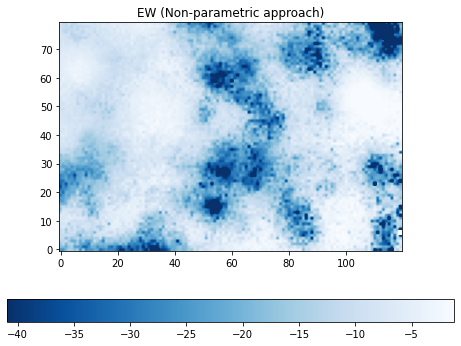

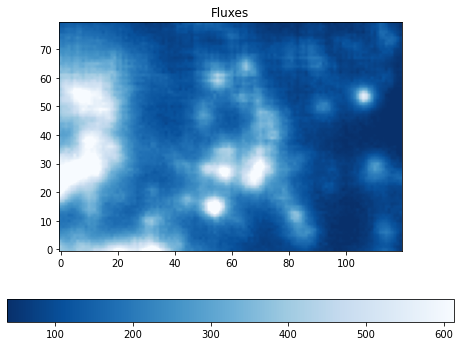

In [288]:

data= np.transpose(map_nonbinned_NP[0])
lo,up = np.nanpercentile(data,2),np.nanpercentile(data,98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
plt.figure(figsize=(8, 6))
plt.imshow(data,cmap=cmap,origin='lower',clim=(lo,up))
plt.colorbar(orientation="horizontal")
plt.title("EW (Non-parametric approach)")
plt.show()


###


data=region[index]
lo,up = np.nanpercentile(data,2),np.nanpercentile(data,98)
plt.figure(figsize=(8, 6))
plt.imshow(data,cmap='Blues_r',origin='lower',clim=(lo,up))
plt.colorbar(orientation="horizontal")
plt.title("Fluxes")
plt.show()

# Velocity maps

In [252]:
rest_wave=wave/(1+z)

In [253]:
spec=region[:,10,10]

# chop data
x_chopped,y_chopped=chop_data(rest_wave,spec,halpha-40,halpha+40)
            
# smooth data
y_smooth=smooth_spectra(y_chopped,3)
            
# fit to continuum
cont=continuum(x_chopped,y_smooth)[0]

In [254]:
velocity(x_chopped,y_chopped,cont,halpha)

192.07420987642814

In [255]:
halpha

6563

In [258]:
map_vel=velocity_map(binned_region,rest_wave,halpha,halpha,kernel_size=3)

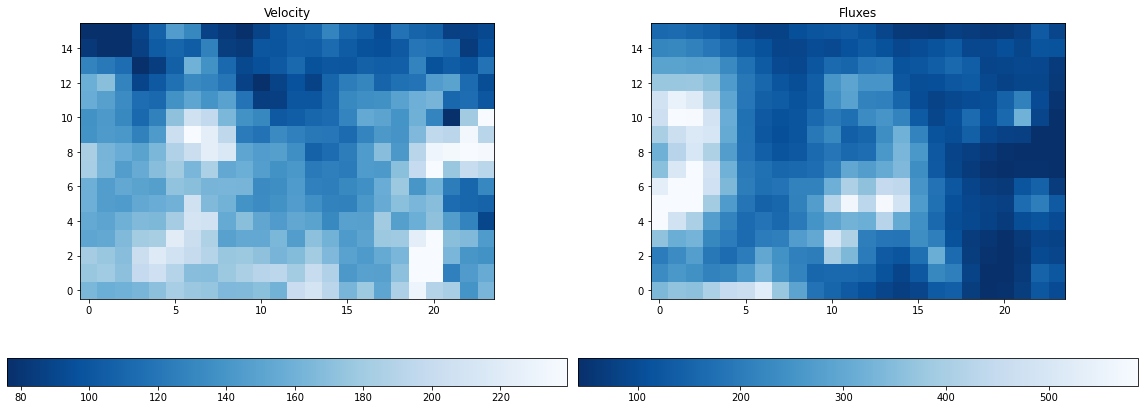

In [290]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

data = np.transpose(map_vel)
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')

im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))  
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("Velocity")

######

data = binned_region[index]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)

im2 = ax[1].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title("Fluxes")

plt.tight_layout()
plt.show()


In [293]:
map_vel=velocity_map(region,rest_wave,halpha,halpha,kernel_size=3)

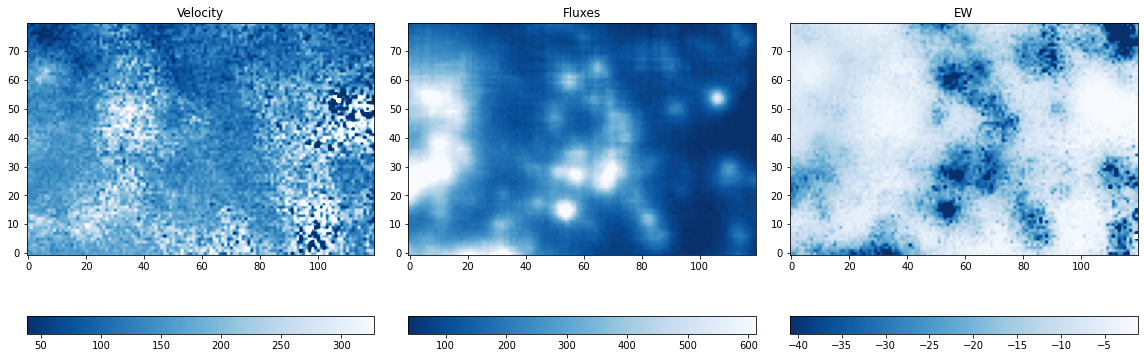

In [301]:

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

data = np.transpose(map_vel)
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')

im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))  
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("Velocity")

######

data = region[index]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)

im2 = ax[1].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title("Fluxes")


######

data = np.transpose(map_nonbinned_NP[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)

im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("EW")

plt.tight_layout()
plt.show()

# Voronoi binning

goal: reach a chosen constant S/N per bin

I will choose noise to be a constant, the standard deviation of the pixel values divided by 50.

In [25]:
header;


selection=findWavelengths(wave, 5000)
selection[1]
cube[selection[1]]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype='>f4')

In [24]:
len(final_x)

NameError: name 'final_x' is not defined

what should I use for the parameter pixelsize? Do i knwo the pixel scale of the cubes?

In [ ]:
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data=cube[selection[1]]
x_len=len(data)
y_len=len(data[0])

#creating arrays of grid x_positions and y_positions

x=range(0,x_len)
y=range(0,y_len)
final_x=[]
final_y=[]
final_signal=[]
j=0
for yy in y:
    i=0
    for xx in x:
        i+=1
        if i%100==0 & j%100==0:
            final_x.append(xx)
            final_y.append(yy)
            final_signal.append(data[xx,yy])
    j+=1
        


target_sn = 10 #whats a good target S/N?

final_x=np.array(final_x)
final_y=np.array(final_y)
final_signal=np.array(final_signal)

# Create a mask that is True where the values are not NaN
mask = ~np.isnan(final_x) & ~np.isnan(final_y) & ~np.isnan(final_signal)

# Apply the mask to filter out NaN values
#print(final_x, final_y, final_signal)2
final_x = final_x[mask]
final_y = final_y[mask]
final_signal = final_signal[mask]

# Print out the filtered arrays to check
#print(final_x, final_y, final_signal)


std_dev=np.nanstd(data)
noise = np.full(shape=len(final_signal),fill_value=std_dev/50)

# Compute Voronoi bins
out=voronoi_2d_binning(final_x, final_y, final_signal, noise, target_sn, plot=True,pixelsize=1)

plt.show();

## Spectra at Hα

In [240]:
z=0.009213

halpha_rest=6562.8
halpha_obs=6562.8*(1+z)
wave_selection=[]

wavelen,index=findWavelengths(wave, halpha_obs)

#plot_image(cube[index],wavelen,index,'Blues_r')


data=cube[index]

In [241]:
from astropy.stats import sigma_clipped_stats,gaussian_sigma_to_fwhm

from photutils import DAOStarFinder

mean, median, std = sigma_clipped_stats(data, sigma=5.0,maxiters=5) 
print((mean, median, std))

daofind = DAOStarFinder(fwhm=50, threshold=10.*std)

sources = daofind(data)

print("     Found %i stars in image " %len(sources))

(39.827423, 13.7210865, 63.754784)
     Found 6 stars in image 


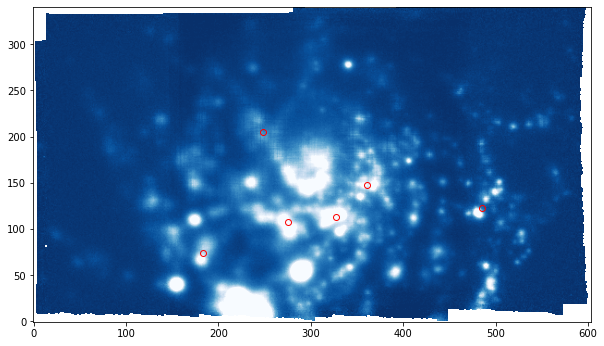

In [242]:

lo,up = np.nanpercentile(data,2),np.nanpercentile(data,98)
plt.figure(figsize=(10, 8))
plt.imshow(data,cmap='Blues_r',origin='lower',clim=(lo,up))
        
        
plt.plot(sources["xcentroid"],sources["ycentroid"],'or',mfc='none');

In [245]:
#defining (x,y) where we want to observe the spectra

i_brightest=np.argsort(sources['flux'])[0]

x_pos=int(sources[i_brightest][1])
y_pos=int(sources[i_brightest][2])

plotting spectra

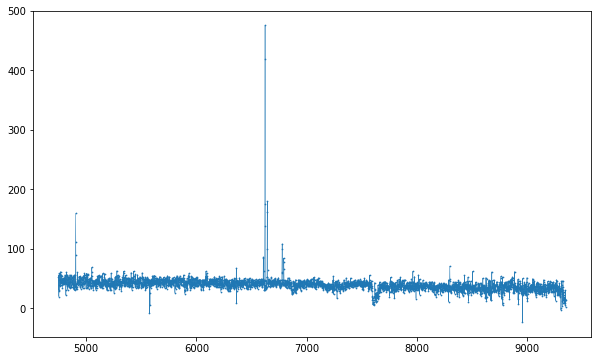

In [246]:
specdata=cube[:,y_pos,x_pos]

plt.figure(figsize=(10,6))

plt.plot(wave,specdata,linewidth=0.5,alpha=0.95)
plt.scatter(wave,specdata,s=0.5)

Text(0.5, 1.0, 'Zoom in Halpha emission region')

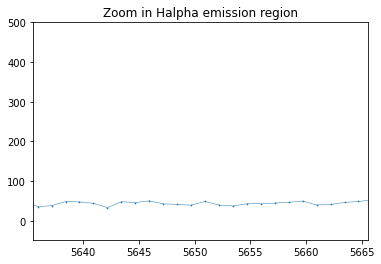

In [253]:
plt.plot(wave,specdata,linewidth=0.5,alpha=0.95)
plt.scatter(wave,specdata,s=0.5)

plt.xlim(halpha_obs-15,halpha_obs+15)
#plt.ylim(-20,90)
plt.title("Zoom in Halpha emission region")

fitting a Gaussian

In [64]:
bound1=int(findWavelengths(wave, 6618)[1])
bound2=int(findWavelengths(wave, 6625)[1])

In [66]:
x = wave[bound1:bound2]
y = specdata[bound1:bound2]

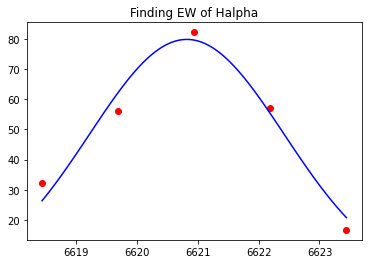

Fitted Amplitude (A): 79.7570857754474
Fitted Mean (mu): 6620.82077366716
Fitted Standard Deviation (sigma): 1.5989482179390269


In [67]:
initial_guess = [max(y), x[np.argmax(y)], 1]

params, covariance = curve_fit(gaussian, x, y, p0=initial_guess)
A_fit, mu_fit, sigma_fit = params


x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, params[0], params[1], params[2])

plt.scatter(x, y, label="Data", color="red")
plt.plot(x_fit, y_fit, label="Gaussian Fit", color="blue")

plt.title("Finding EW of Halpha")
plt.show()


# Print fitted parameters
print(f"Fitted Amplitude (A): {A_fit}")
print(f"Fitted Mean (mu): {mu_fit}")
print(f"Fitted Standard Deviation (sigma): {sigma_fit}")

Integral using Simpson's rule: 281.6268


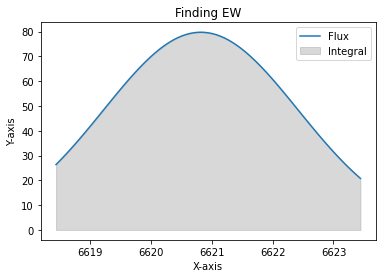

In [77]:

from scipy.integrate import simps

x = np.linspace(x_fit[0],x_fit[len(x_fit)-1], 100)  

# Compute the integral using Simpson's rule
integral_simps = simps(y_fit, x)

print(f"Integral using Simpson's rule: {integral_simps:.4f}")

# Plot the curve
plt.plot(x, y_fit, label="Flux")
plt.fill_between(x, y_fit, alpha=0.3, color='gray', label="Integral")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Finding EW")
plt.show()


## Using Specutils

In [79]:
#from astropy.io import fits

from astropy import units as u

from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f656aa54e80>

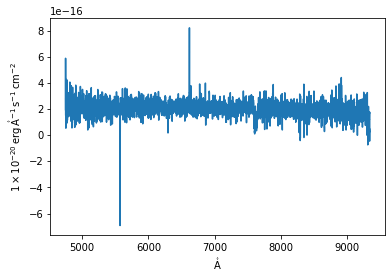

In [80]:
from specutils import Spectrum1D

lamb = wave * u.AA 

flux = specdata * 10**-17 * u.Unit(str(header["BUNIT"])) #taking the units from the header of the cube

spec = Spectrum1D(spectral_axis=lamb, flux=flux)

f, ax = plt.subplots()  

ax.step(spec.spectral_axis, spec.flux) 
#ax.set_xlim(halpha_obs-15,halpha_obs+15)

Calculating SNR of the spectra

In [81]:
from specutils.analysis import snr_derived

snr_derived(spec)

<Quantity 4.432747>

In [82]:
import warnings

from specutils.fitting import fit_generic_continuum

with warnings.catch_warnings():  # Ignore warnings

    warnings.simplefilter('ignore')

    #normalizing by continuum estimate
    cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 

In [130]:
fit_generic_continuum.param_names

AttributeError: 'function' object has no attribute 'param_names'

ESTE ajuste está onde? fit_generic_continuum

(6598.263076399999, 6648.263076399999)

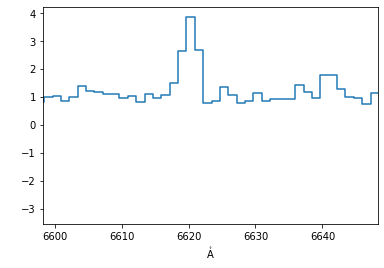

In [83]:
f, ax = plt.subplots()  

ax.step(cont_norm_spec.wavelength, cont_norm_spec.flux)  

ax.set_xlim((halpha_obs-25)/10 * u.nm,(halpha_obs+25)/10 * u.nm)  

In [84]:
from specutils import SpectralRegion

from specutils.analysis import equivalent_width

equivalent_width(cont_norm_spec, regions=SpectralRegion((halpha_obs-25)/10 * u.nm,(halpha_obs+25)/10 * u.nm))

<Quantity -11.53433117 Angstrom>

### Slicing a spectra into a particular region of interest

In [85]:
from specutils.manipulation import spectral_slab

ss = spectral_slab(cont_norm_spec, 5000.*u.AA, 5003.*u.AA)
ss

<Spectrum1D(flux=<Quantity [1.0896934 , 0.89806395]> (shape=(2,), mean=0.99388); spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [5000.94238281 5002.19238281] Angstrom> (length=2))>

### Calculating Moments

In [86]:
from specutils.analysis import moment

m = moment(spec, order=1) 

m.shape  


print(m)

6953.192735554875 Angstrom


## Line Finding

In [87]:
cont_norm_spec; #continuum normalized spectra

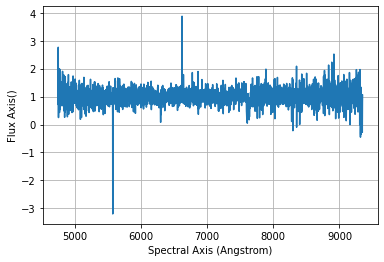

In [88]:
plt.plot(cont_norm_spec.spectral_axis, cont_norm_spec.flux) 

plt.xlabel('Spectral Axis ({})'.format(cont_norm_spec.spectral_axis.unit)) 

plt.ylabel('Flux Axis({})'.format(cont_norm_spec.flux.unit)) 

plt.grid(True)

Estimating uncertainty

In [89]:
ss = spectral_slab(cont_norm_spec, (halpha_obs-10)*u.AA, (halpha_obs+10)*u.AA) 
ss

<Spectrum1D(flux=<Quantity [0.83285743, 1.13031769, 0.9865351 , 1.07730173, 1.52001143,
           2.64860749, 3.87609295, 2.69161481, 0.78927651, 0.85823559,
           1.35906313, 1.08187466, 0.78013955, 0.85364203, 1.13819795,
           0.84613211]> (shape=(16,), mean=1.40437); spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [6613.44238281 6614.69238281 6615.94238281 ... 6629.69238281 6630.94238281
 6632.19238281] Angstrom> (length=16))>

In [90]:
from specutils.manipulation import noise_region_uncertainty

noise_region = SpectralRegion(0*u.um, 3*u.um)

cont_norm_spec = noise_region_uncertainty(ss, noise_region)

from specutils.fitting import find_lines_threshold

lines = find_lines_threshold(ss, noise_factor=3)  

lines[lines['line_type'] == 'emission']


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


<QTable length=1>
  line_center   line_type line_center_index
    Angstrom                               
    float64        str8         int64      
--------------- --------- -----------------
6620.9423828125  emission                 6

### Parameter Estimation

our specdata is in units 10**(-20) erg / (Angstrom s cm2) so we have to convert it to Jy using:

1 Jy = 10**(-23) erg/(cm^2)

In [91]:
(str(header["BUNIT"]))

'10**(-20)*erg/s/cm**2/Angstrom'

In [92]:
"""auxspec=specdata*10**(20) #this is in erg / (Angstrom s cm2)
auxspec=specdata*10**(20)*10**(-10) #this is in erg / ( s cm2)"""
auxspec=specdata*halpha_obs**2/(3.34*10**(-19))

In [93]:
lamb = wave * u.AA 
flux = auxspec * u.Unit(str('Jy')) 

spec = Spectrum1D(spectral_axis=lamb, flux=flux)

In [99]:
from specutils import SpectralRegion

from specutils.fitting import estimate_line_parameters

from specutils.manipulation import extract_region

sub_region = SpectralRegion((halpha_obs-25)/10 *u.um, (halpha_obs+25)/10 *u.um)

sub_spectrum = extract_region(spec, sub_region)

In [100]:
result = estimate_line_parameters(spec, models.Gaussian1D())

print(result.amplitude)

print(result.mean) 

print(result.stddev) 

Parameter('amplitude', value=1.0786672501485288e+28, unit=Jy)
Parameter('mean', value=6953.192977414863, unit=Angstrom)
Parameter('stddev', value=1309.7939786398235, unit=Angstrom, bounds=(1.1754943508222875e-38, None))


In [97]:
from astropy.modeling import models
from specutils.fitting import fit_lines
from astropy import units as u


# Fit the spectrum and calculate the fitted flux values (``y_fit``)
g_init = models.Gaussian1D(amplitude=1.1*u.Jy, mean=halpha_obs*u.um, stddev=13*u.um)
g_fit = fit_lines(spec, g_init)


y_fit = g_fit(x*u.um)

# Plot the original spectrum and the fitted.
plt.plot(spec, , label="Original spectrum")
plt.plot(spec, y_fit, label="Fit result")
plt.title('Single fit peak')
plt.grid(True)
plt.legend()

SyntaxError: invalid syntax (1266487270.py, line 14)